In [1]:
#getting and working with data
import pandas as pd
import numpy as np
import scipy as sp
import re
import os

#visualizing results
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('poster', rc={'font.size':35,
                              'axes.titlesize':50,
                              'axes.labelsize':35})

pd.set_option('display.max_rows', 50000)
pd.set_option('display.max_columns', 50000)
pd.set_option('display.width', 100000)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

### Methods

#### Lever press discrimination 
- 6 sessions
- 60 min each
- active and inactive levers
- flashing cue light above active
- 30 second ITI after active lp
- nothing after inactive lp

####

In [2]:
#read in task dfs and combine

path = 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Analysis/Excel files/Med boxes/reward_learning_r1'
all_data = pd.DataFrame() 

file_names = os.listdir(path)
print(len(file_names))

file_paths = []

for file in file_names:
    
    file_path = path + '/' + file
    file_paths.append(file_path)

print(len(file_paths))

for path in file_paths:
    print(path)
    df_int = pd.read_csv(path)
    df_int = pd.DataFrame(data = df_int)
    print(df_int.shape)
    
    all_data = pd.concat([all_data, df_int], axis=0)
    print(all_data.shape)

#rearrange columns
all_data = all_data[['date', 'stage', 'type', 'session', 'session_num', 'cage', 'animal_number',
       'group', 'active_lever', 'trial_num', 'trial_bin',
       'trial_duration', 'lever_ratio', 'reinforcement_count',
       'reinforcement_latency_1st', 'HE_count', 'HE_latency_1st',
       'HE_latency_ave', 'active_lever_count', 'active_lever_latency_1st',
       'inactive_lever_count', 'inactive_lever_latency_1st',
       'active_lever_latency_ave', 'inactive_lever_latency_ave',
       'reinforcement_latency_ave']]

#update group names
all_data['group'].replace({1: 'sham', 2: 'blast'}, inplace=True)
all_data.head()

9
9
C:/Users/Schindler/Documents/Schindler_Lab/Data/Analysis/Excel files/Med boxes/reward_learning_r1/extinction_learn.csv
(9372, 25)
(9372, 25)
C:/Users/Schindler/Documents/Schindler_Lab/Data/Analysis/Excel files/Med boxes/reward_learning_r1/lever_disc_learn.csv
(13950, 25)
(23322, 25)
C:/Users/Schindler/Documents/Schindler_Lab/Data/Analysis/Excel files/Med boxes/reward_learning_r1/post_PR_retrain.csv
(8881, 25)
(32203, 25)
C:/Users/Schindler/Documents/Schindler_Lab/Data/Analysis/Excel files/Med boxes/reward_learning_r1/PR_test.csv
(1148, 25)
(33351, 25)
C:/Users/Schindler/Documents/Schindler_Lab/Data/Analysis/Excel files/Med boxes/reward_learning_r1/PR_train.csv
(4455, 25)
(37806, 25)
C:/Users/Schindler/Documents/Schindler_Lab/Data/Analysis/Excel files/Med boxes/reward_learning_r1/reinst_cue.csv
(1250, 25)
(39056, 25)
C:/Users/Schindler/Documents/Schindler_Lab/Data/Analysis/Excel files/Med boxes/reward_learning_r1/reinst_drug.csv
(1007, 25)
(40063, 25)
C:/Users/Schindler/Documents/Sc

,date,stage,type,session,session_num,cage,animal_number,group,active_lever,trial_num,trial_bin,trial_duration,lever_ratio,reinforcement_count,reinforcement_latency_1st,HE_count,HE_latency_1st,HE_latency_ave,active_lever_count,active_lever_latency_1st,inactive_lever_count,inactive_lever_latency_1st,active_lever_latency_ave,inactive_lever_latency_ave,reinforcement_latency_ave
0,200316,extinction_learn,session,EXT,1,158,825,sham,0,0,0.0,3.68,1.00,0.0,NaN,0,NaN,NaN,1.0,3.67,0.0,NaN,3.67,NaN,NaN
1,200316,extinction_learn,session,EXT,1,158,825,sham,0,1,0.0,7.02,0.50,0.0,NaN,0,NaN,NaN,1.0,7.01,1.0,3.73,7.01,3.730000,NaN
2,200316,extinction_learn,session,EXT,1,158,825,sham,0,2,0.0,4.43,1.00,0.0,NaN,0,NaN,NaN,1.0,4.42,0.0,NaN,4.42,NaN,NaN
3,200316,extinction_learn,session,EXT,1,158,825,sham,0,3,0.0,21.94,0.25,0.0,NaN,0,NaN,NaN,1.0,21.93,3.0,17.13,21.93,18.313333,NaN
4,200316,extinction_learn,session,EXT,1,158,825,sham,0,4,0.0,28.47,0.50,0.0,NaN,0,NaN,NaN,1.0,28.46,1.0,2.62,28.46,2.620000,NaN


In [3]:
all_data.groupby(['stage', 'session'])['session_num'].value_counts()

stage             session  session_num
PR_test           PR1      1               563
                  PR13     1               585
PR_train          FR3      1              2919
                  FR33     1              1536
extinction_learn  EXT      1              2480
                           2              1838
                           3              1509
                           4              1232
                           5              1182
                           6              1131
lever_disc_learn  FR1      4              2944
                           5              2892
                           6              2884
                           3              2544
                           2              1942
                           1               744
post_PR_retrain   FR1      7              3008
                           8              3004
                           9              2869
reinst_cue        RCP      1              1250
reinst_drug       RDP

### Lever press aquisition

In [29]:
data = all_data[all_data['stage'] == 'lever_disc_learn']
data_session = data[data['type'] == 'session']
data_ITI = data[data['type'] == 'ITI']
data.tail(1)

,date,stage,type,session,session_num,cage,animal_number,group,active_lever,trial_num,trial_bin,trial_duration,lever_ratio,reinforcement_count,reinforcement_latency_1st,HE_count,HE_latency_1st,HE_latency_ave,active_lever_count,active_lever_latency_1st,inactive_lever_count,inactive_lever_latency_1st,active_lever_latency_ave,inactive_lever_latency_ave,reinforcement_latency_ave
13949,200224,lever_disc_learn,ITI,FR1,6,163,842,blast,0,92,5,29.99,NaN,1,0.0,1,0.77,0.77,0,NaN,0,NaN,NaN,NaN,0.0


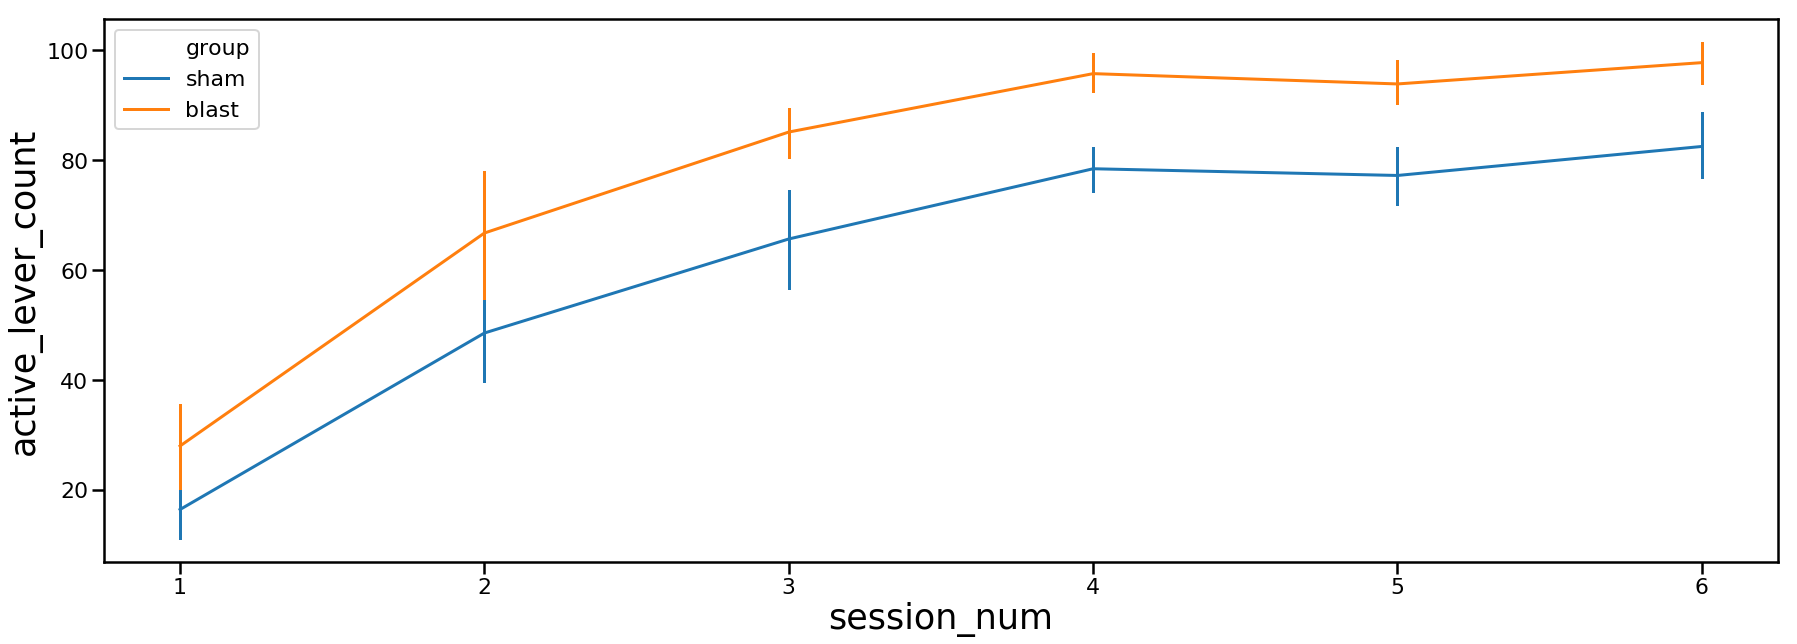

In [6]:
plt.figure(figsize=(30,10))
sns.lineplot(x='session_num', y='active_lever_count', data=data_session.groupby(['session_num', 'animal_number', 'group'])['active_lever_count'].sum().reset_index(), hue='group', err_style='bars', ci=68)

plt.show()

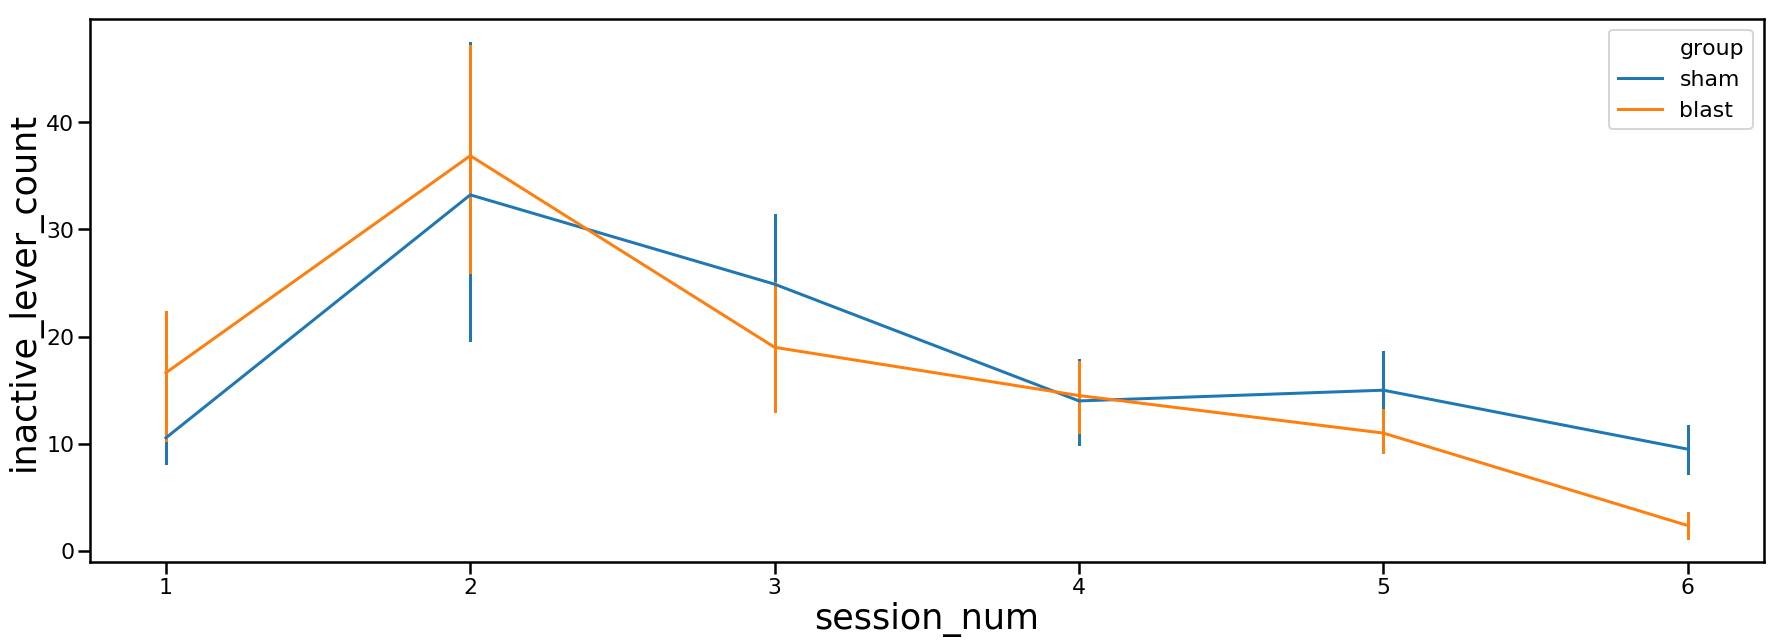

In [7]:
plt.figure(figsize=(30,10))
sns.lineplot(x='session_num', y='inactive_lever_count', data=data_session.groupby(['session_num', 'animal_number', 'group'])['inactive_lever_count'].sum().reset_index(), hue='group', err_style='bars', ci=68)

plt.show()

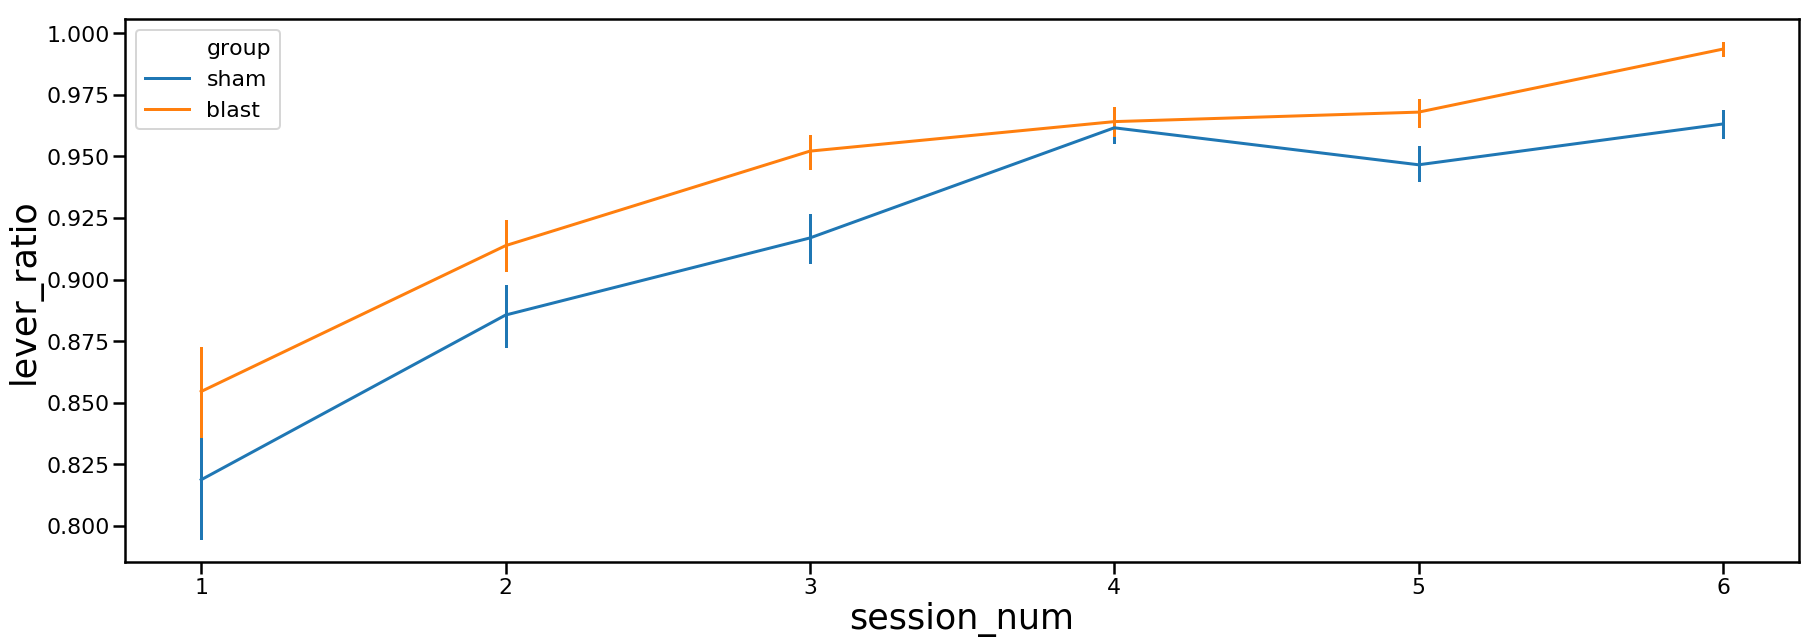

In [8]:
plt.figure(figsize=(30,10))
sns.lineplot(x='session_num', y='lever_ratio', data=data_session, hue='group', err_style='bars', ci=68)

plt.show()

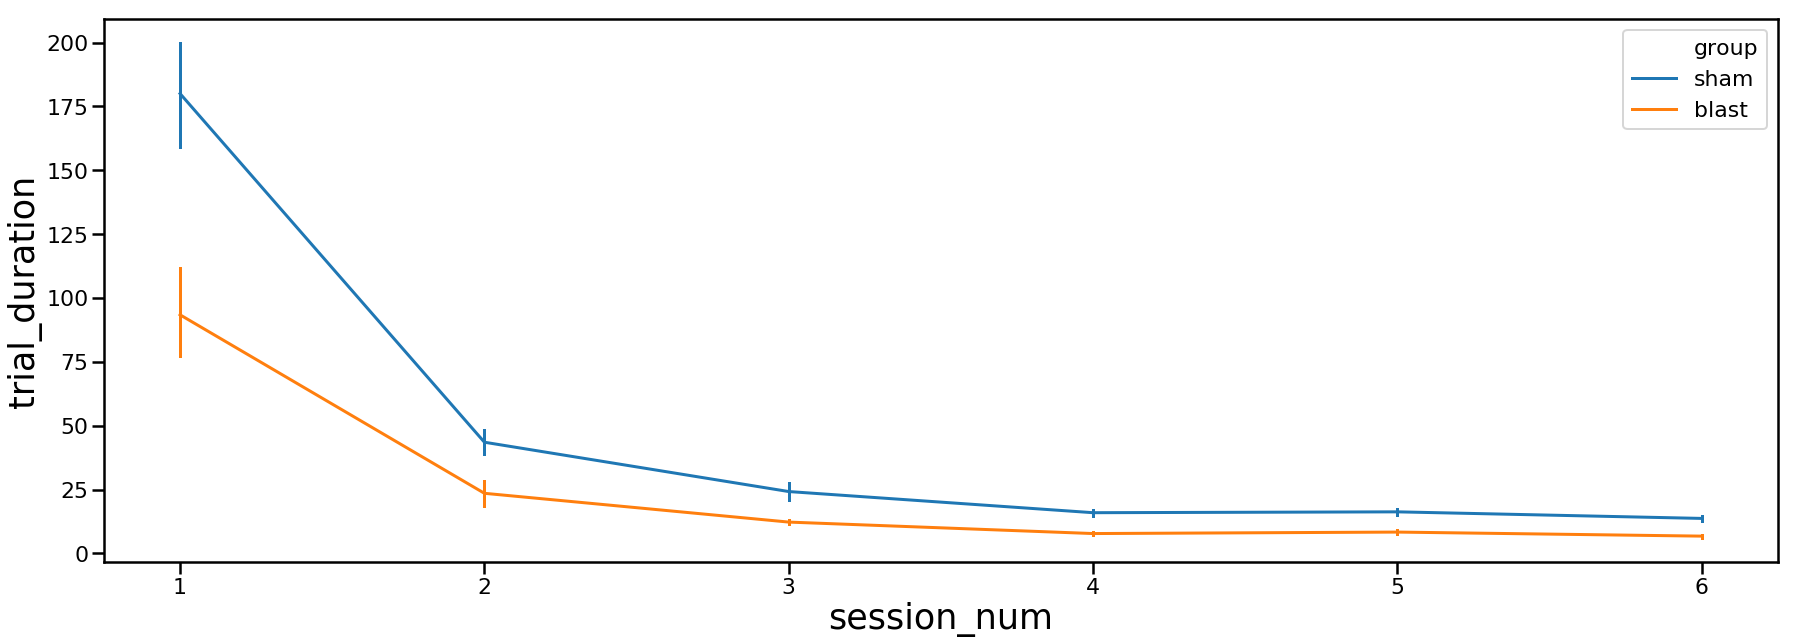

In [9]:
plt.figure(figsize=(30,10))
sns.lineplot(x='session_num', y='trial_duration', data=data_session, hue='group', err_style='bars', ci=68)

plt.show()

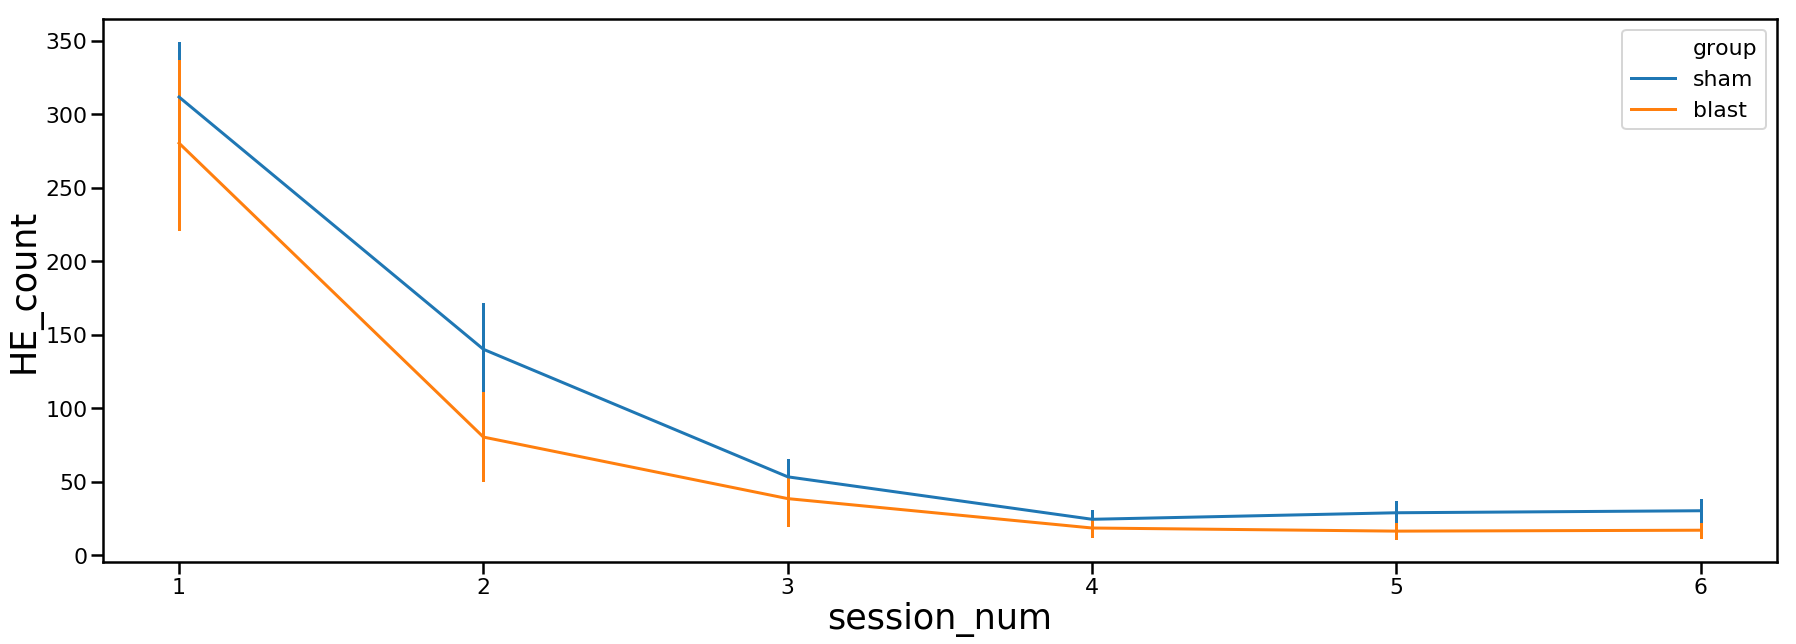

In [11]:
plt.figure(figsize=(30,10))
sns.lineplot(x='session_num', y='HE_count', data=data_session.groupby(['session_num', 'animal_number', 'group'])['HE_count'].sum().reset_index(), hue='group', err_style='bars', ci=68)

plt.show()

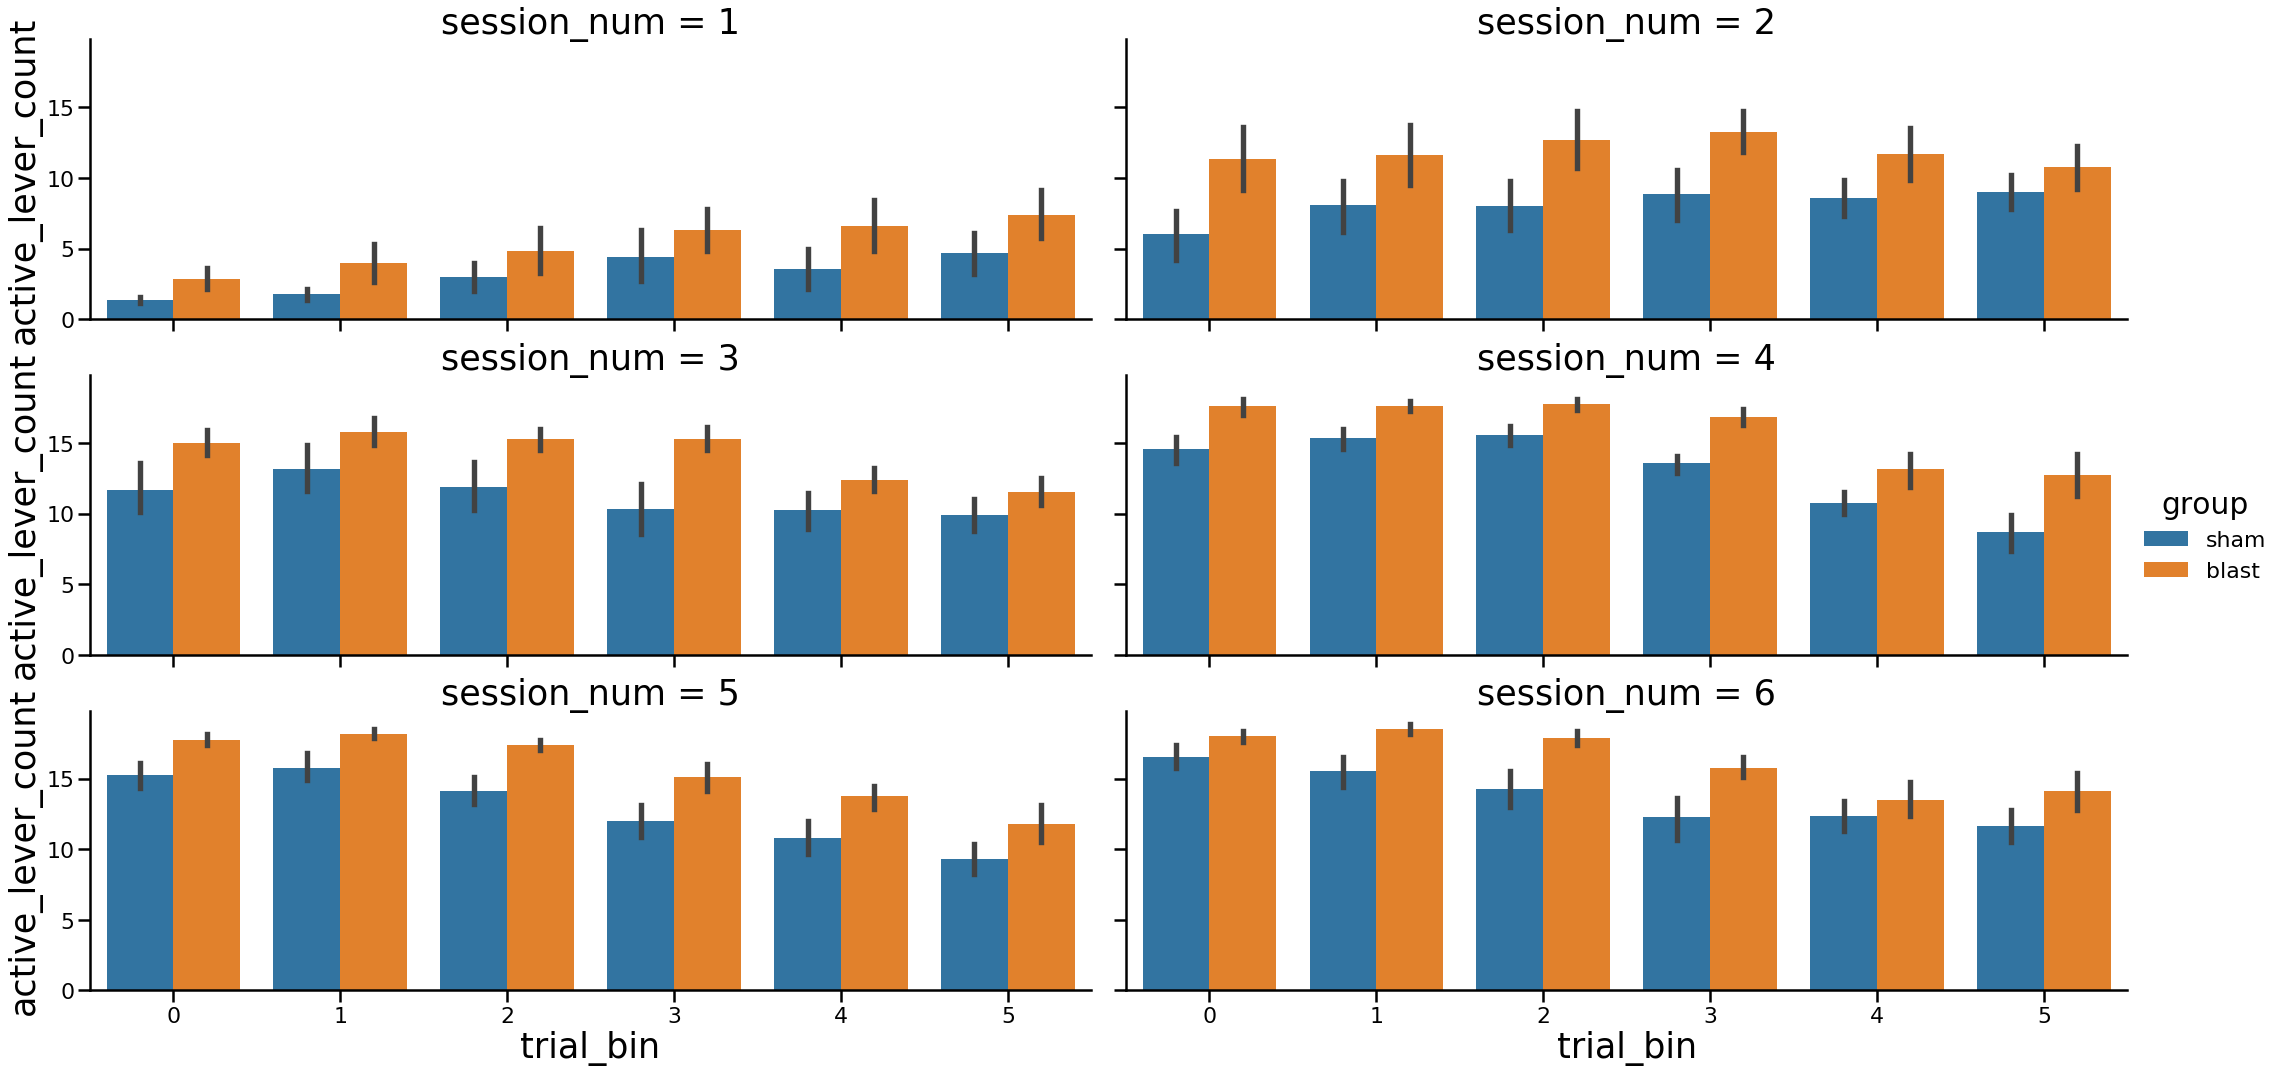

In [30]:
sns.catplot(x='trial_bin', y='active_lever_count', data=data_session.groupby(['session_num', 'trial_bin', 'animal_number', 'group'])['active_lever_count'].sum().reset_index(), hue='group', col='session_num', col_wrap=2, kind='bar', height=5, aspect=3, ci=68)

plt.show()

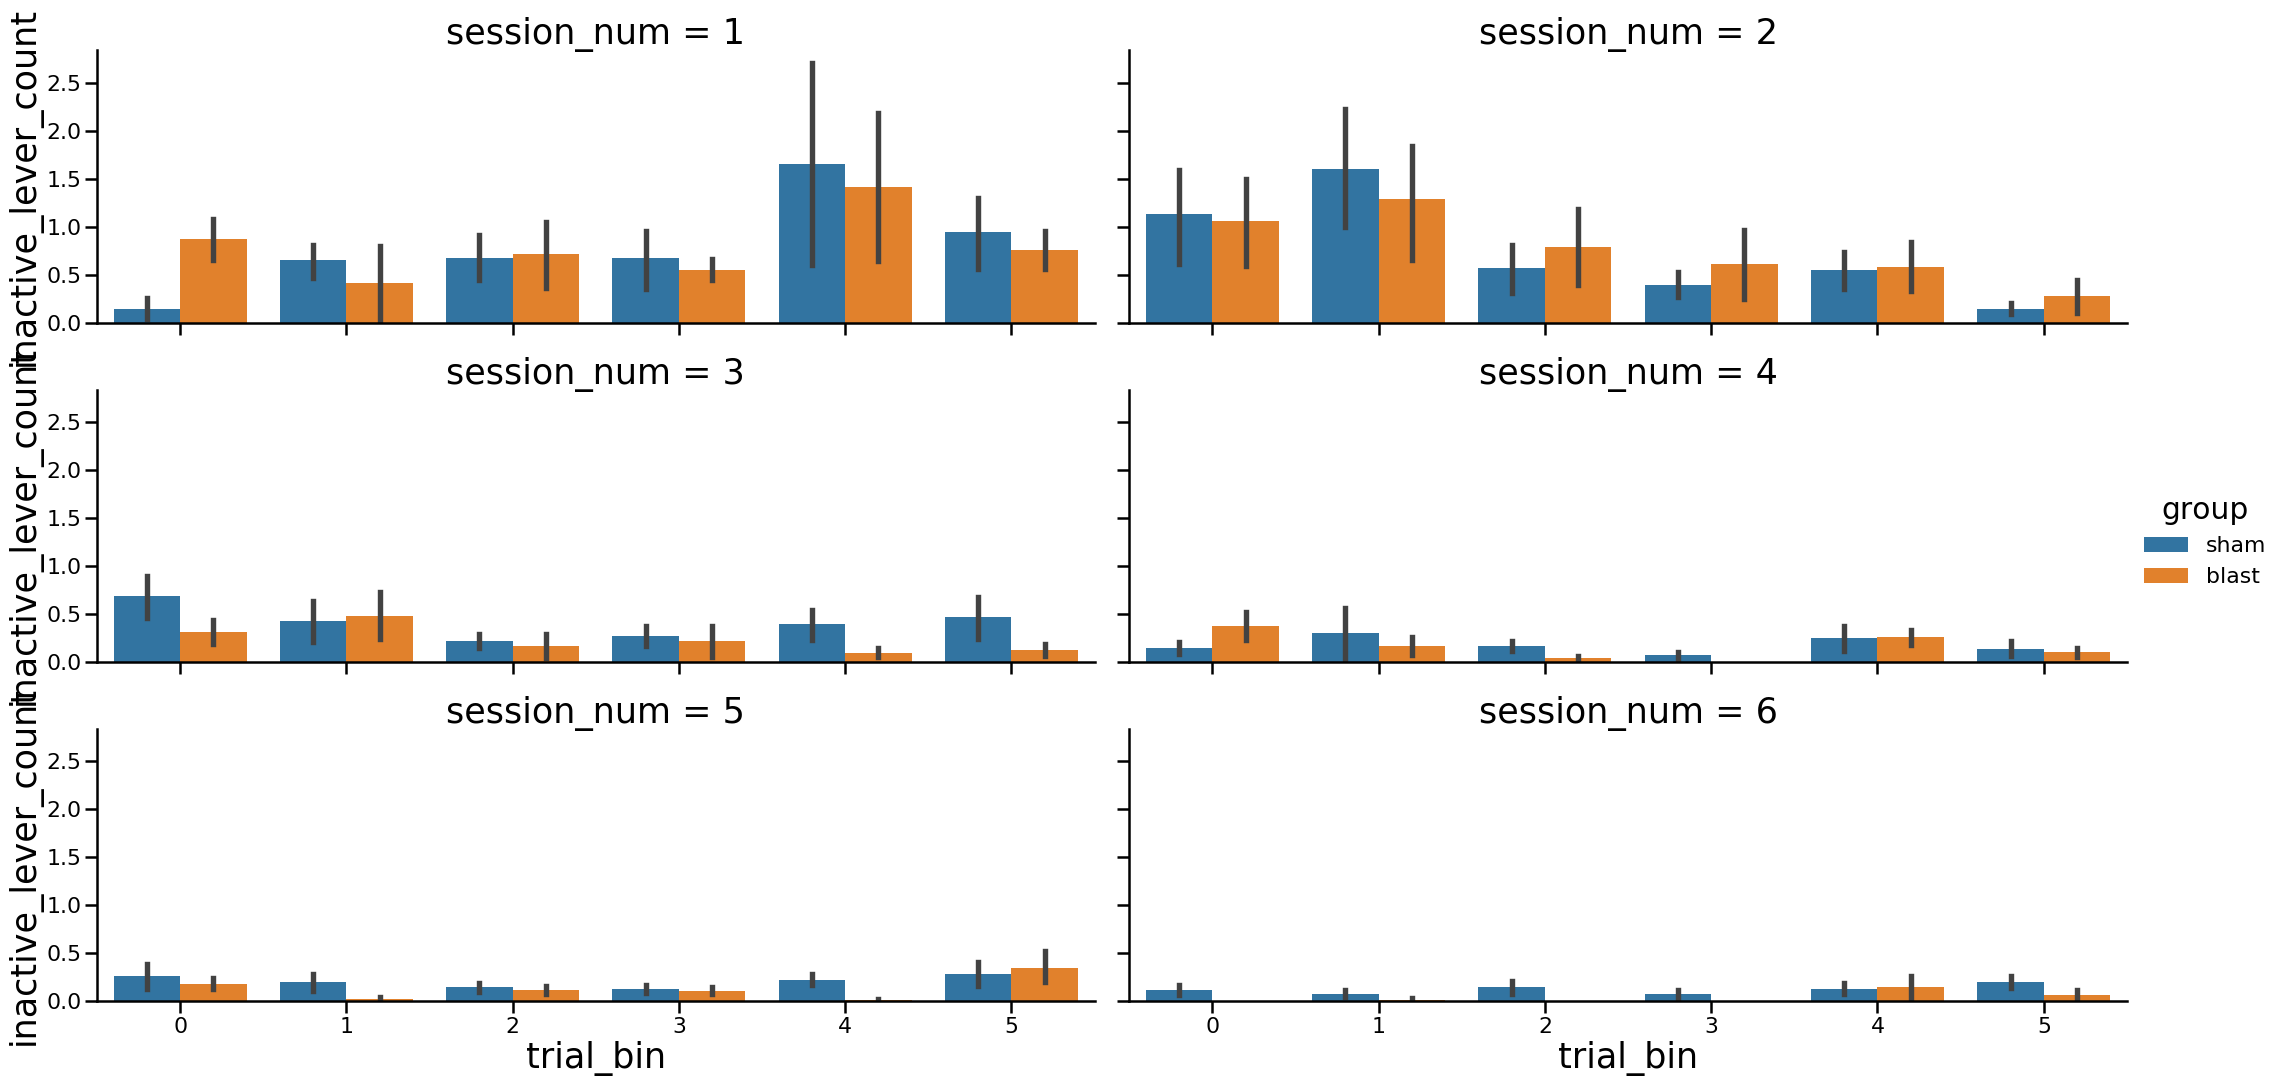

In [31]:
sns.catplot(x='trial_bin', y='inactive_lever_count', data=data_session.groupby(['session_num', 'trial_bin', 'animal_number', 'group'])['inactive_lever_count'].mean().reset_index(), hue='group', col='session_num', col_wrap=2, kind='bar', height=5, aspect=3, ci=68)

plt.show()

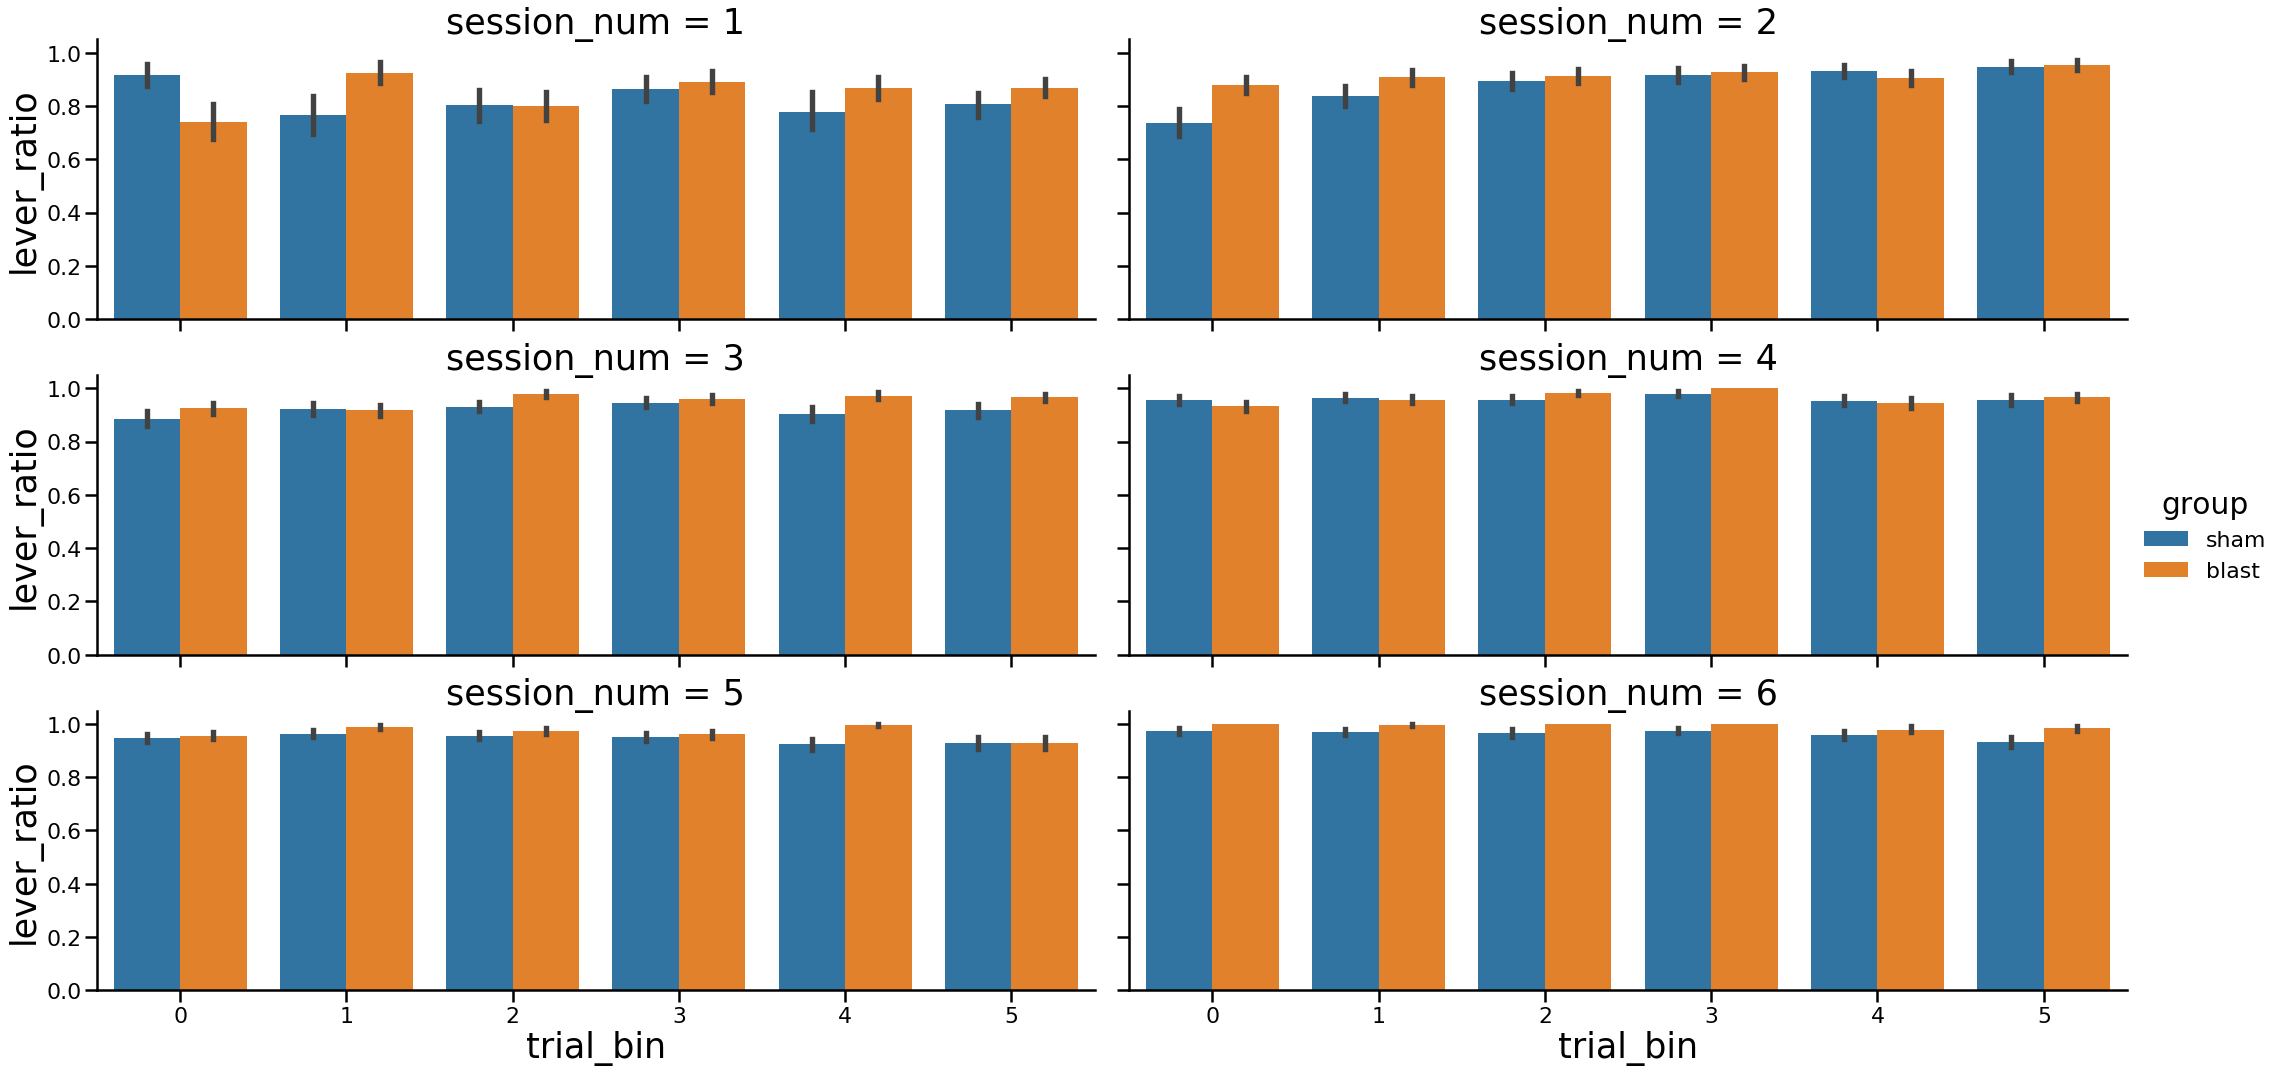

In [32]:
sns.catplot(x='trial_bin', y='lever_ratio', data=data_session, hue='group', col='session_num', col_wrap=2, kind='bar', height=5, aspect=3, ci=68)

plt.show()

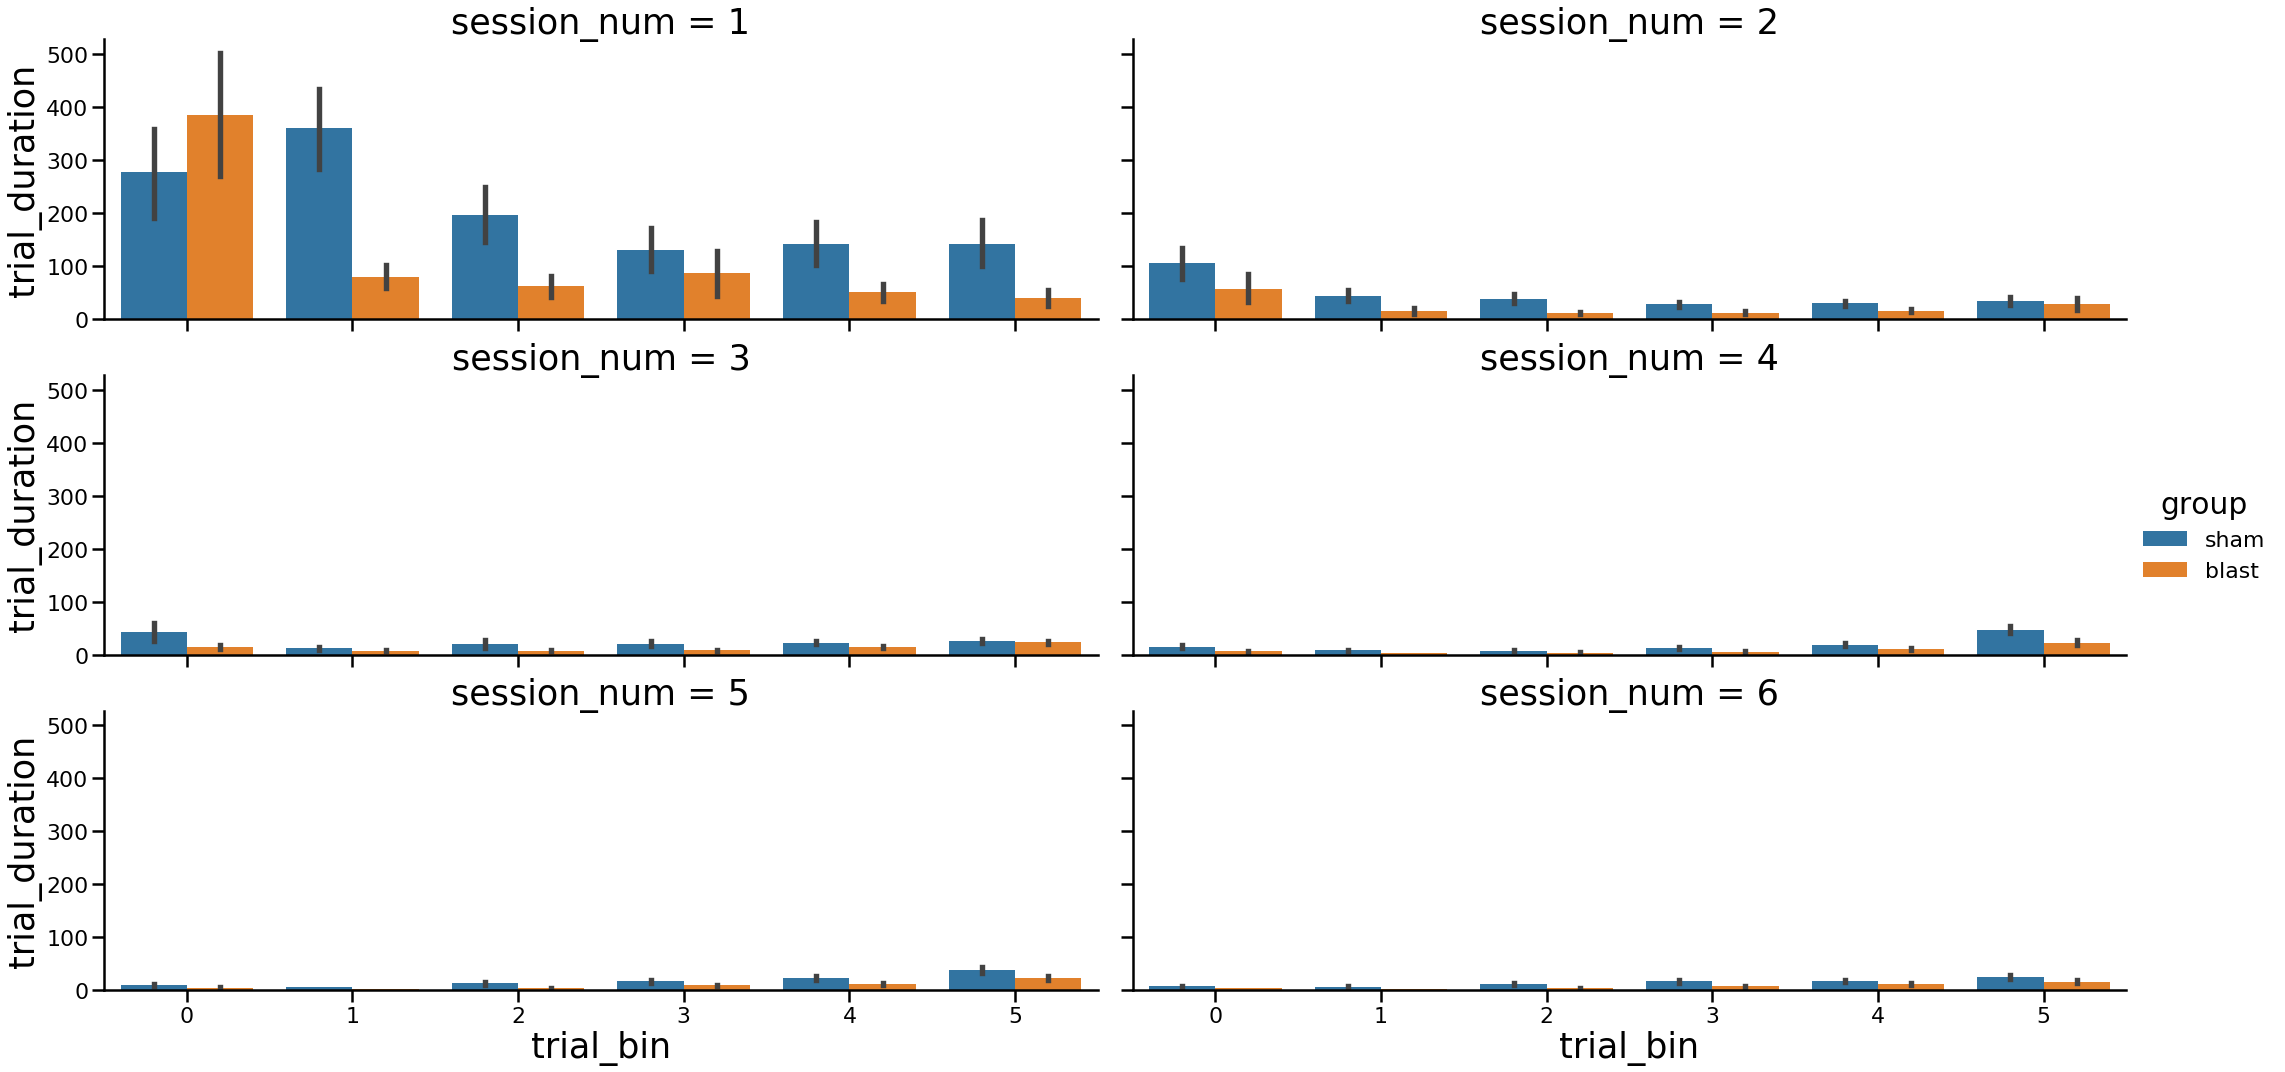

In [33]:
sns.catplot(x='trial_bin', y='trial_duration', data=data_session, hue='group', col='session_num', col_wrap=2, kind='bar', height=5, aspect=3, ci=68)

plt.show()

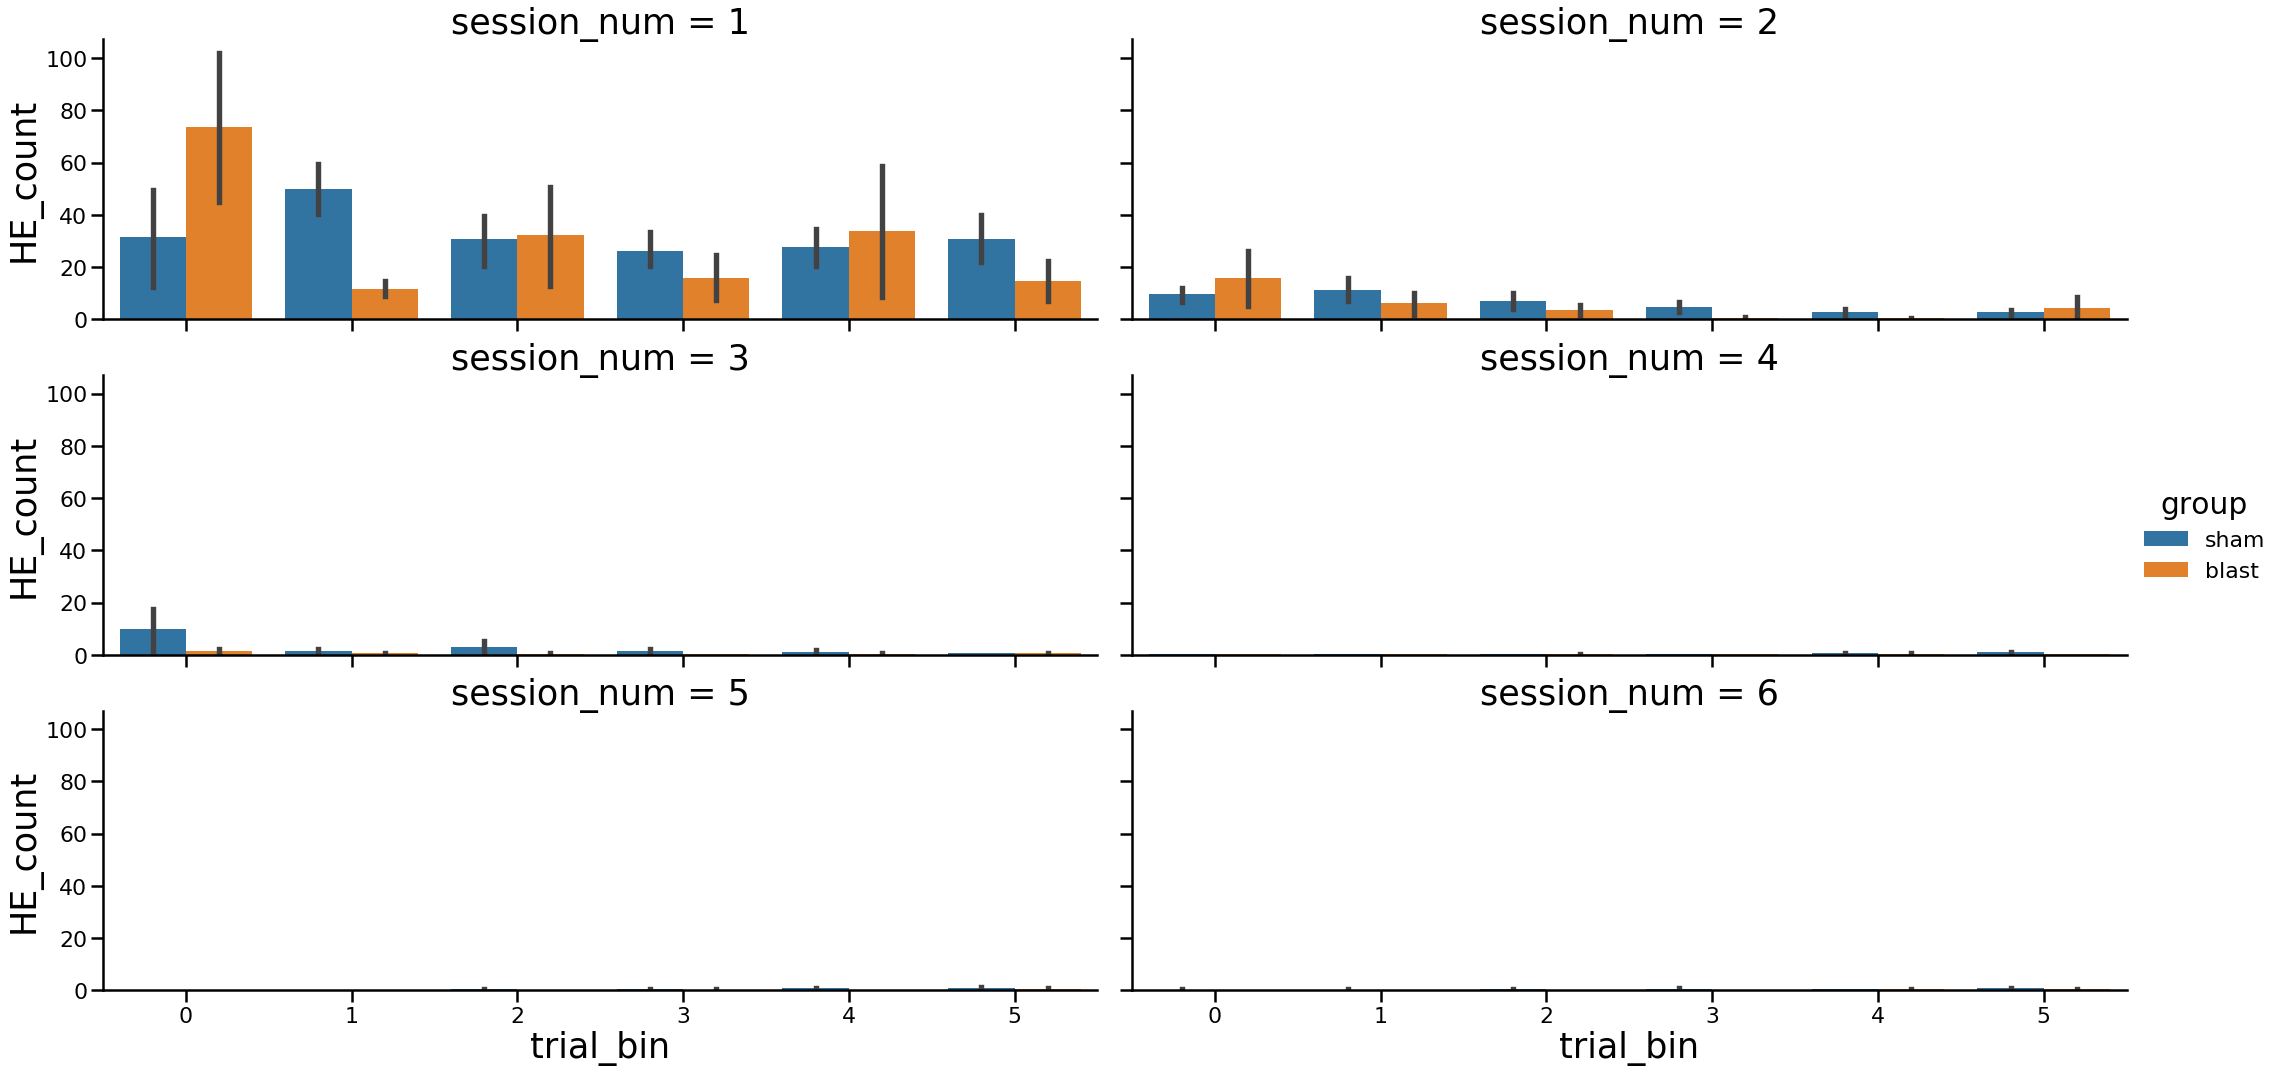

In [34]:
sns.catplot(x='trial_bin', y='HE_count', data=data_session.groupby(['session_num', 'trial_bin', 'animal_number', 'group'])['HE_count'].mean().reset_index(), hue='group', col='session_num', col_wrap=2, kind='bar', height=5, aspect=3, ci=68)

plt.show()

### Break point

In [5]:
data = all_data[(all_data['stage'] == 'PR_test') & (all_data['reinforcement_count'] > 0)]
data_session = data[data['type'] == 'session']
data_ITI = data[data['type'] == 'ITI']
data_session.head(1)

,date,stage,type,session,session_num,cage,animal_number,group,active_lever,trial_num,trial_bin,trial_duration,lever_ratio,reinforcement_count,reinforcement_latency_1st,HE_count,HE_latency_1st,HE_latency_ave,active_lever_count,active_lever_latency_1st,inactive_lever_count,inactive_lever_latency_1st,active_lever_latency_ave,inactive_lever_latency_ave,reinforcement_latency_ave
0,200228,PR_test,session,PR13,1,158,825,sham,0,0,0.0,8.06,1.0,1.0,8.06,0,NaN,NaN,1.0,8.05,0.0,NaN,8.05,NaN,8.06


In [49]:
data_session.groupby(['session', 'animal_number', 'group'])['active_lever_count'].sum()

session  animal_number  group
PR1      825            sham      606
         826            sham     1204
         827            sham     1204
         828            sham      854
         829            sham      606
         830            sham     1204
         831            sham      153
         832            sham      305
         833            sham      430
         834            blast     854
         835            blast     305
         836            blast     854
         837            blast    1204
         839            blast    1698
         840            blast     854
         841            blast     854
         842            blast    1204
PR13     825            sham      430
         826            sham     2401
         827            sham     2401
         828            sham      153
         829            sham      305
         830            sham      854
         831            sham      153
         832            sham      216
         833        

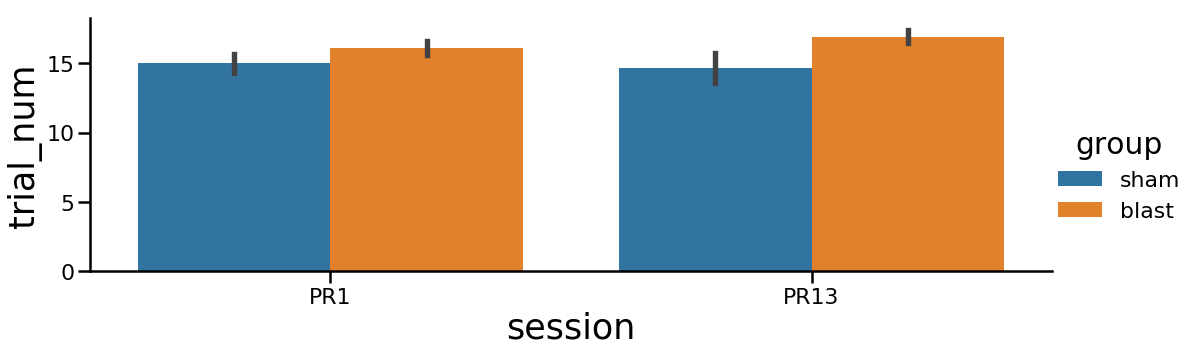

In [7]:
sns.catplot(x='session', y='trial_num', data=data_ITI.groupby(['session', 'animal_number', 'group'])['trial_num'].max().reset_index(), hue='group', kind='bar', height=5, aspect=3, ci=68)

plt.show()

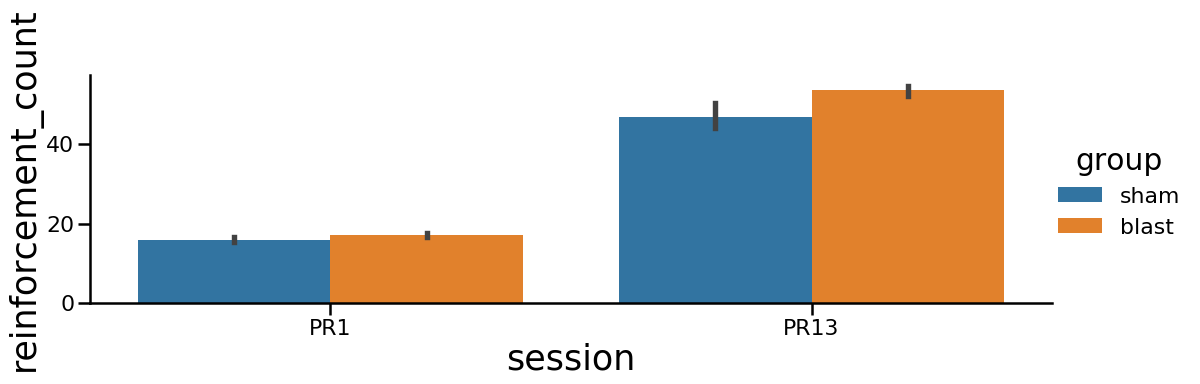

In [46]:
sns.catplot(x='session', y='reinforcement_count', data=data_ITI.groupby(['session', 'animal_number', 'group'])['reinforcement_count'].sum().reset_index(), hue='group', kind='bar', height=5, aspect=3, ci=68)

plt.show()

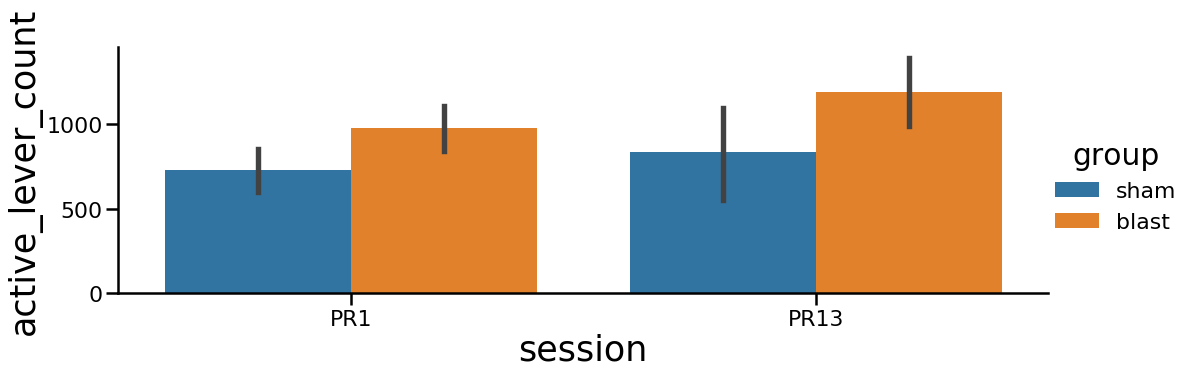

In [50]:
sns.catplot(x='session', y='active_lever_count', data=data_session.groupby(['session', 'animal_number', 'group'])['active_lever_count'].sum().reset_index(), hue='group', kind='bar', height=5, aspect=3, ci=68)

plt.show()

### Reversal learning

In [55]:
data = all_data[all_data['stage'] == 'reversal_learn']
data_session = data[data['type'] == 'session']
data_ITI = data[data['type'] == 'ITI']
data.head(1)

,date,stage,type,session,session_num,cage,animal_number,group,active_lever,trial_num,trial_bin,trial_duration,lever_ratio,reinforcement_count,reinforcement_latency_1st,HE_count,HE_latency_1st,HE_latency_ave,active_lever_count,active_lever_latency_1st,inactive_lever_count,inactive_lever_latency_1st,active_lever_latency_ave,inactive_lever_latency_ave,reinforcement_latency_ave
0,200310,reversal_learn,session,RLFR1,1,158,825,sham,0,0,0,692.76,0.012987,1,692.76,39,5.2,383.585641,1,692.75,76,2.02,692.75,314.918026,692.76


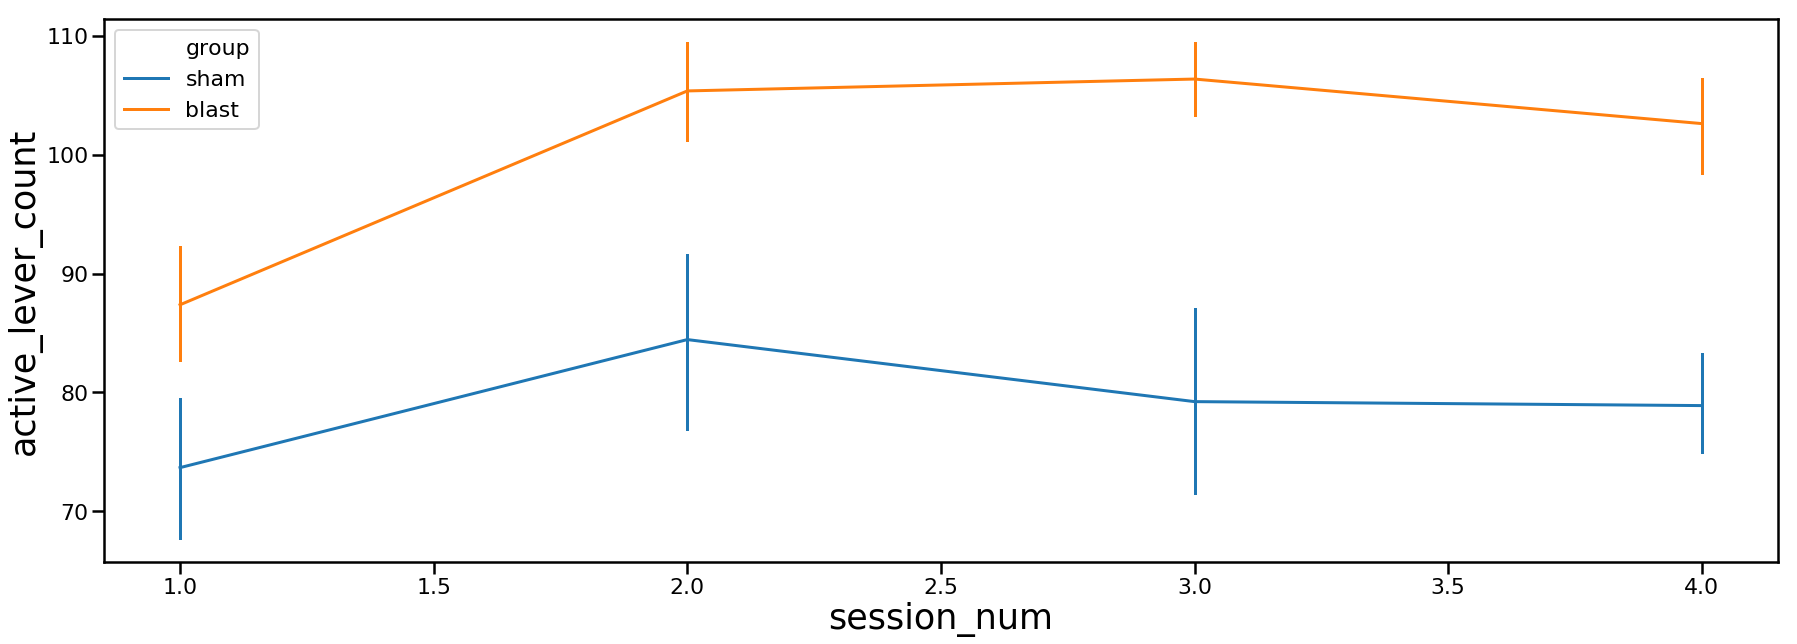

In [56]:
plt.figure(figsize=(30,10))
sns.lineplot(x='session_num', y='active_lever_count', data=data_session.groupby(['session_num', 'animal_number', 'group'])['active_lever_count'].sum().reset_index(), hue='group', err_style='bars', ci=68)

plt.show()

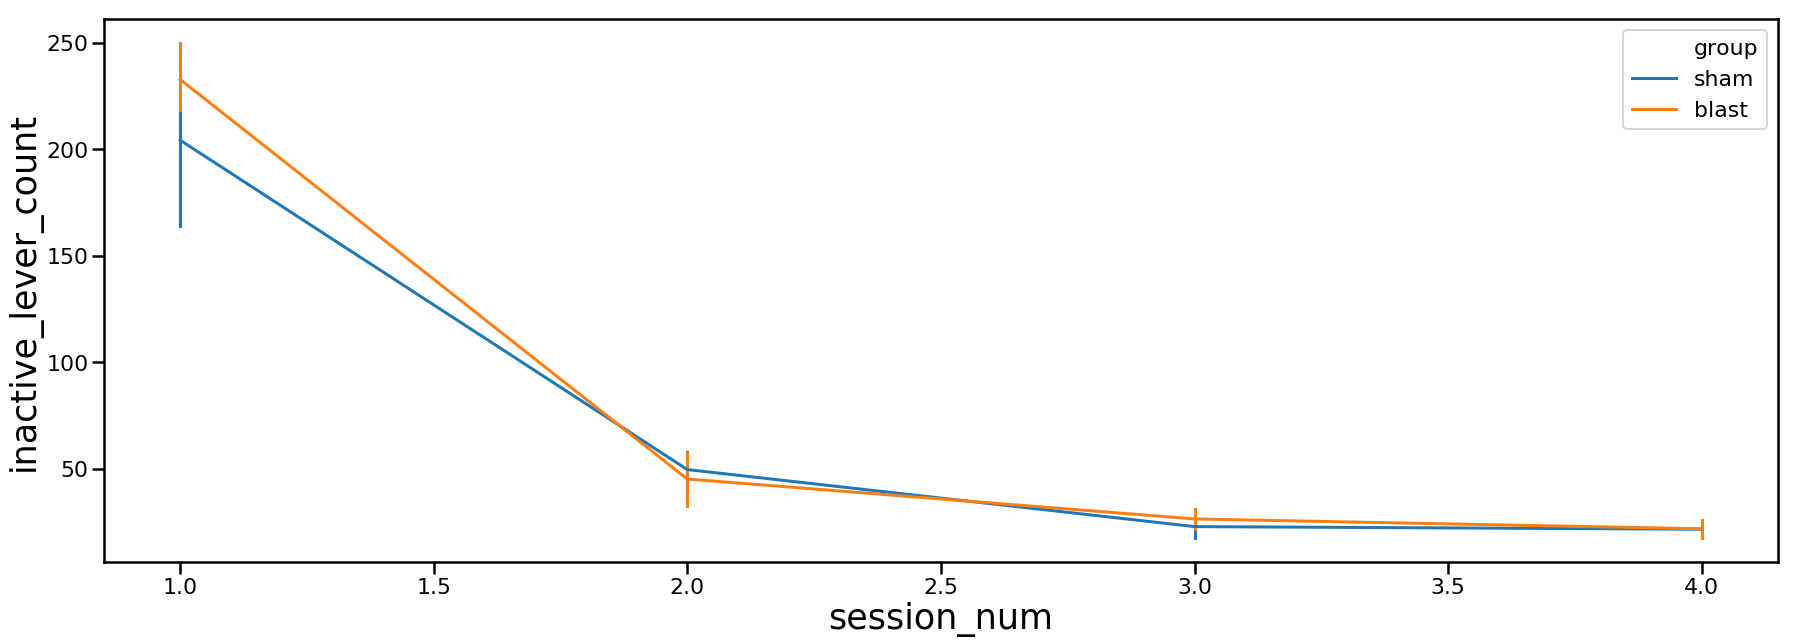

In [57]:
plt.figure(figsize=(30,10))
sns.lineplot(x='session_num', y='inactive_lever_count', data=data_session.groupby(['session_num', 'animal_number', 'group'])['inactive_lever_count'].sum().reset_index(), hue='group', err_style='bars', ci=68)

plt.show()

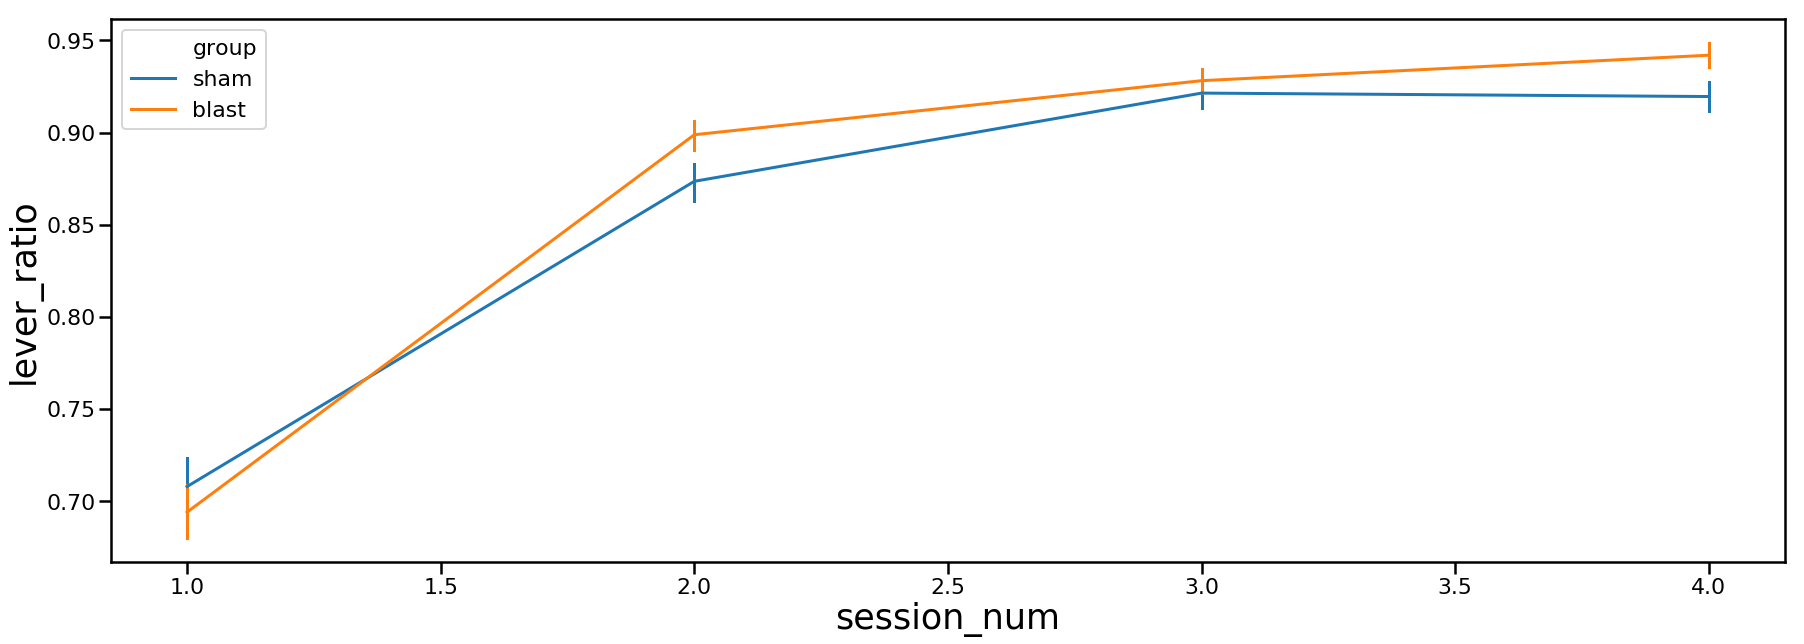

In [58]:
plt.figure(figsize=(30,10))
sns.lineplot(x='session_num', y='lever_ratio', data=data_session, hue='group', err_style='bars', ci=68)

plt.show()

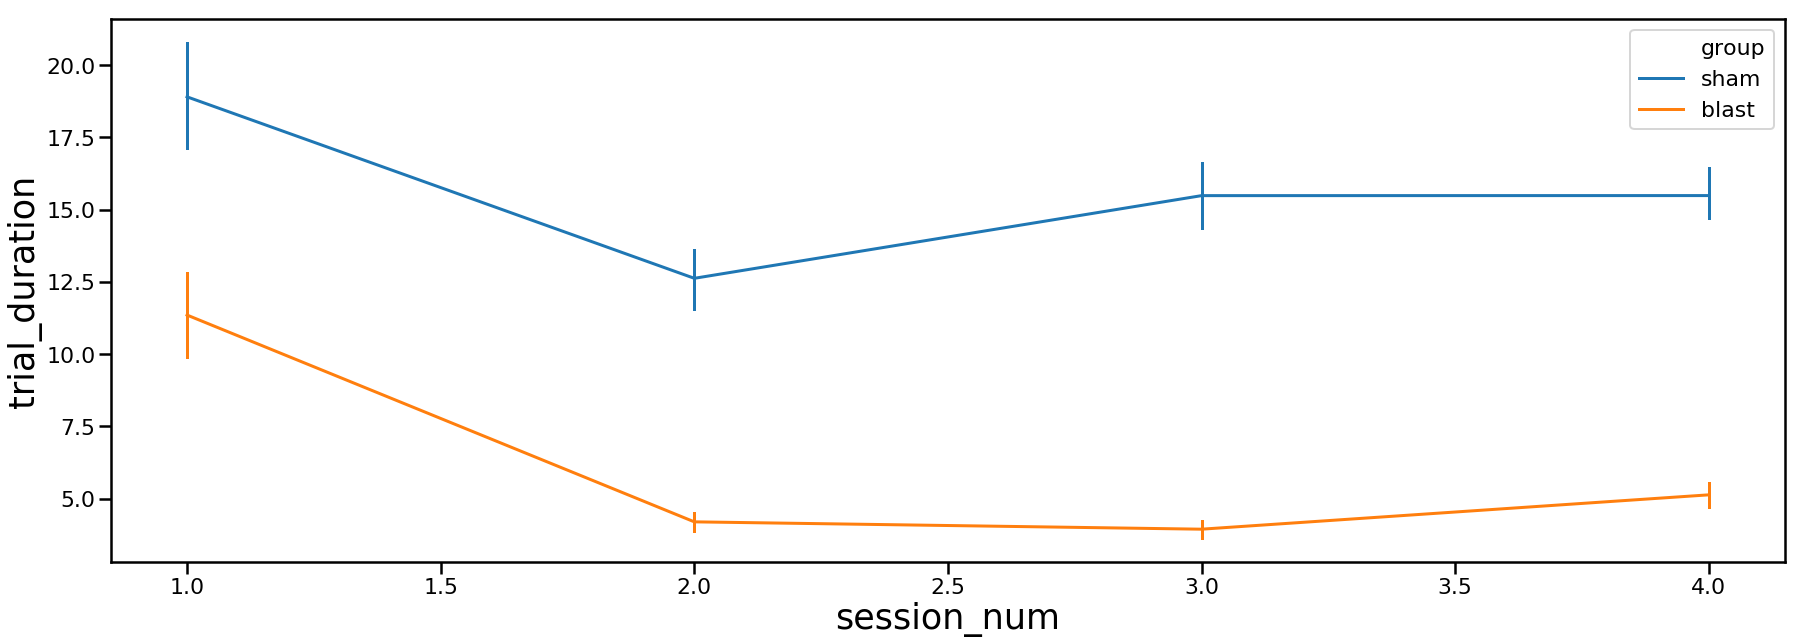

In [59]:
plt.figure(figsize=(30,10))
sns.lineplot(x='session_num', y='trial_duration', data=data_session, hue='group', err_style='bars', ci=68)

plt.show()

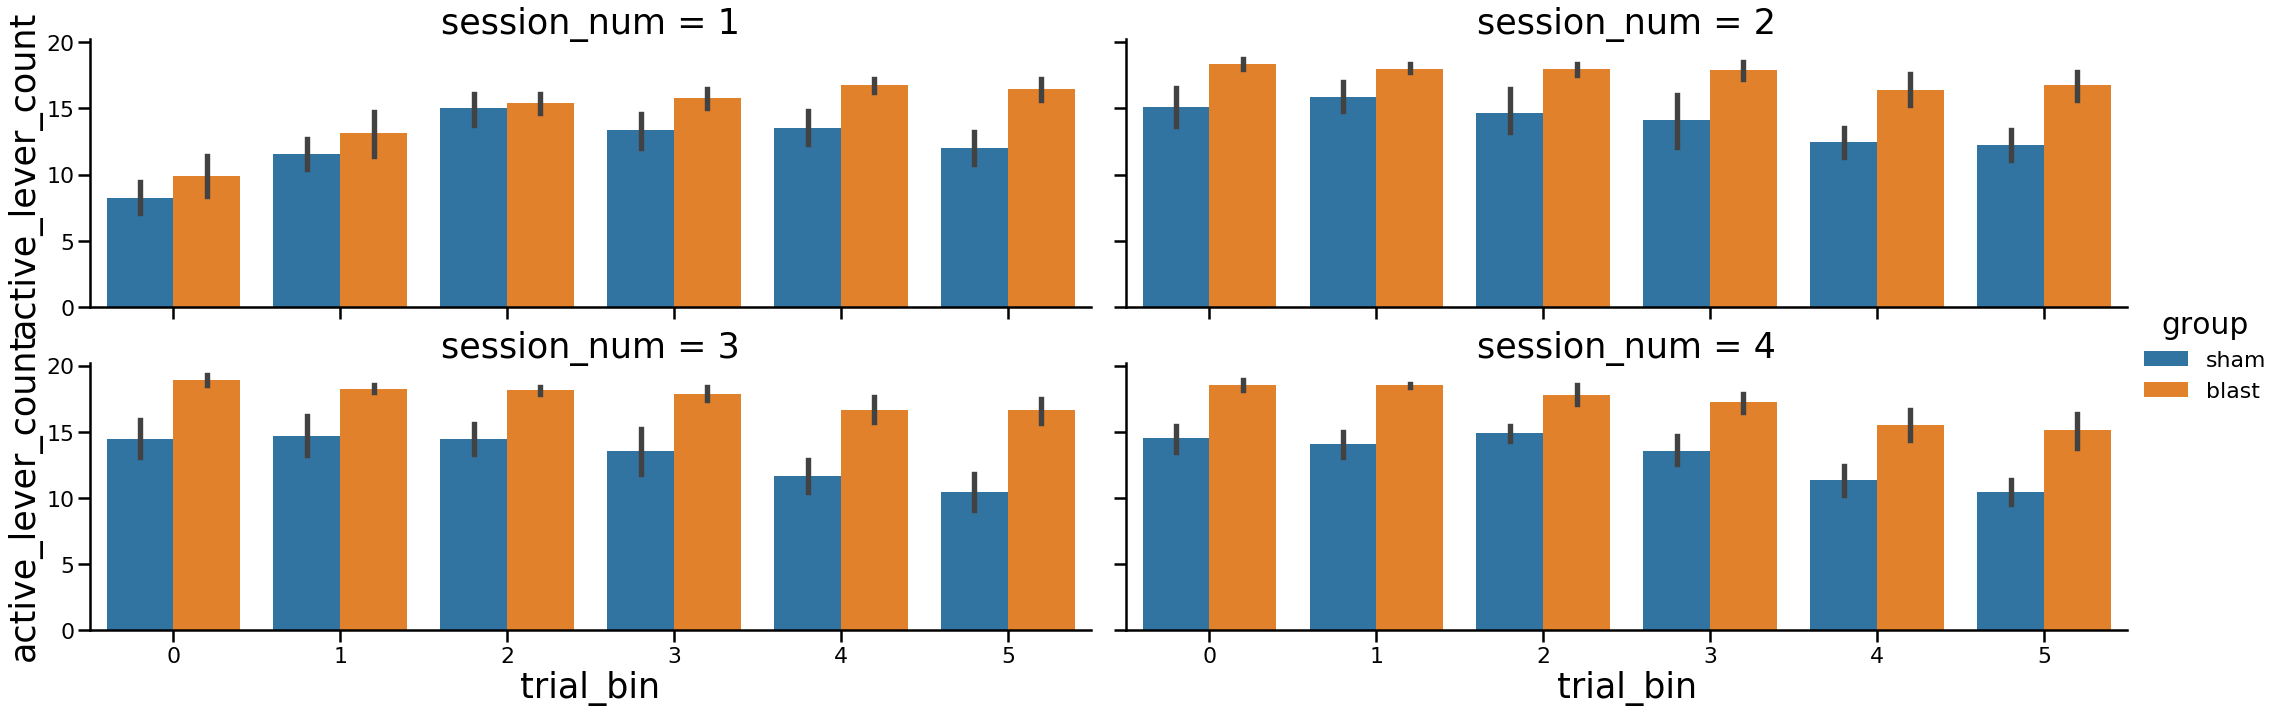

In [61]:
sns.catplot(x='trial_bin', y='active_lever_count', data=data_session.groupby(['session_num', 'trial_bin', 'animal_number', 'group'])['active_lever_count'].sum().reset_index(), hue='group', col='session_num', col_wrap=2, kind='bar', height=5, aspect=3, ci=68)

plt.show()

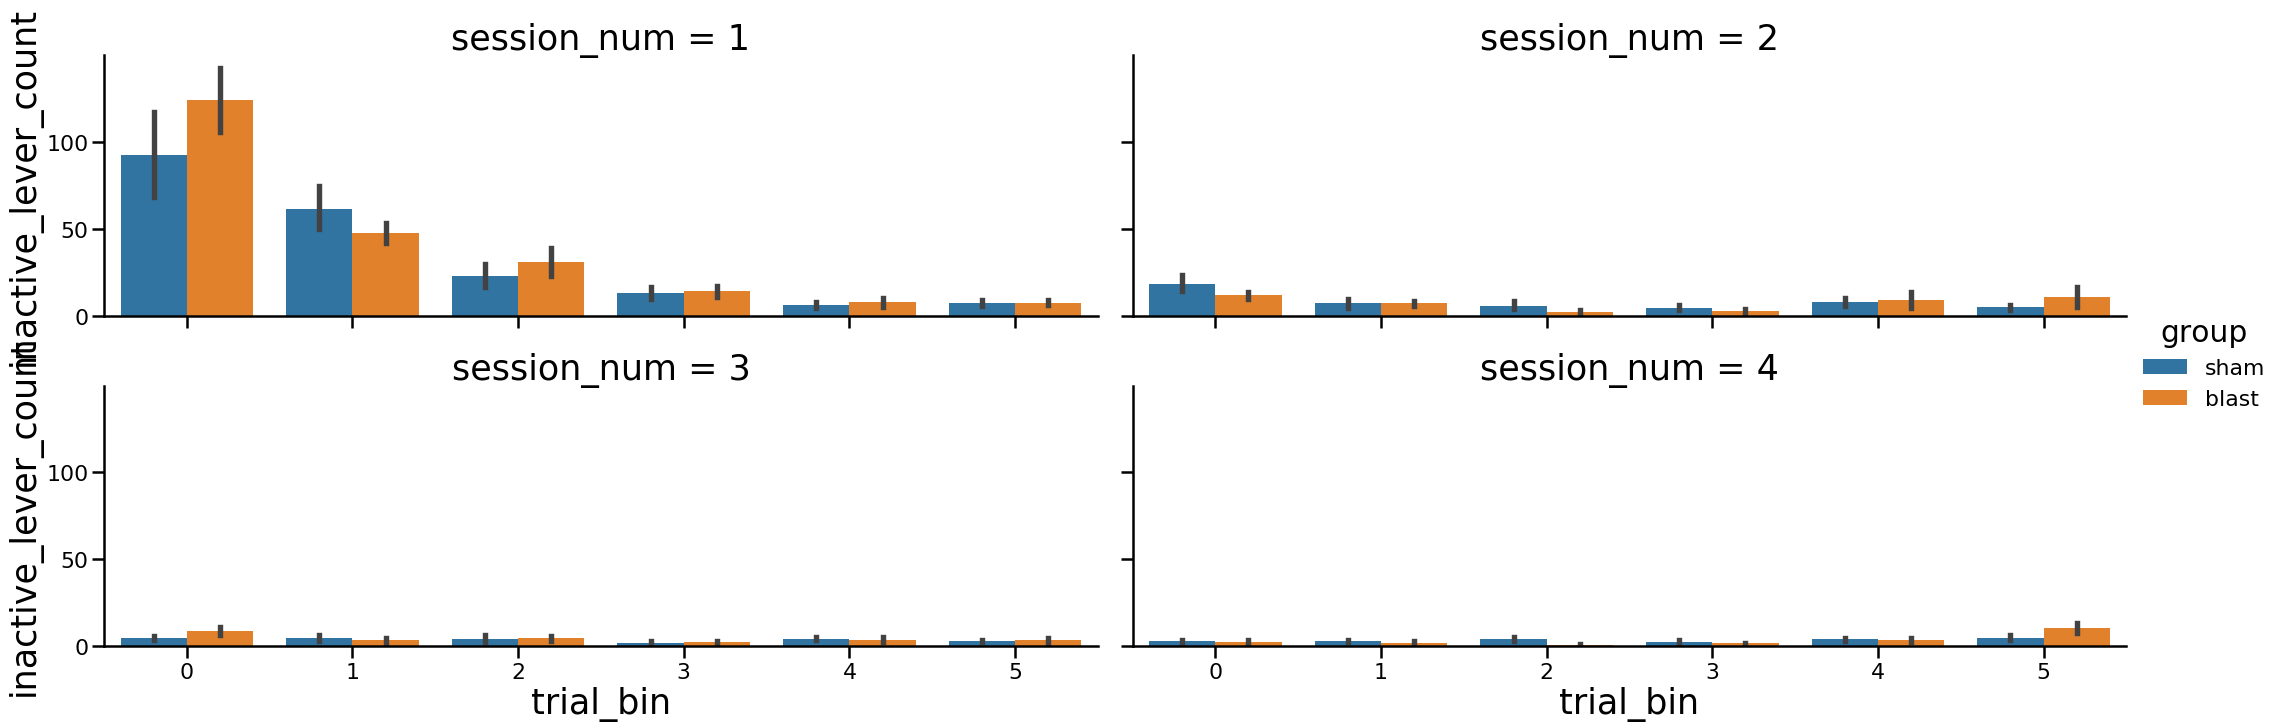

In [62]:
sns.catplot(x='trial_bin', y='inactive_lever_count', data=data_session.groupby(['session_num', 'trial_bin', 'animal_number', 'group'])['inactive_lever_count'].sum().reset_index(), hue='group', col='session_num', col_wrap=2, kind='bar', height=5, aspect=3, ci=68)

plt.show()

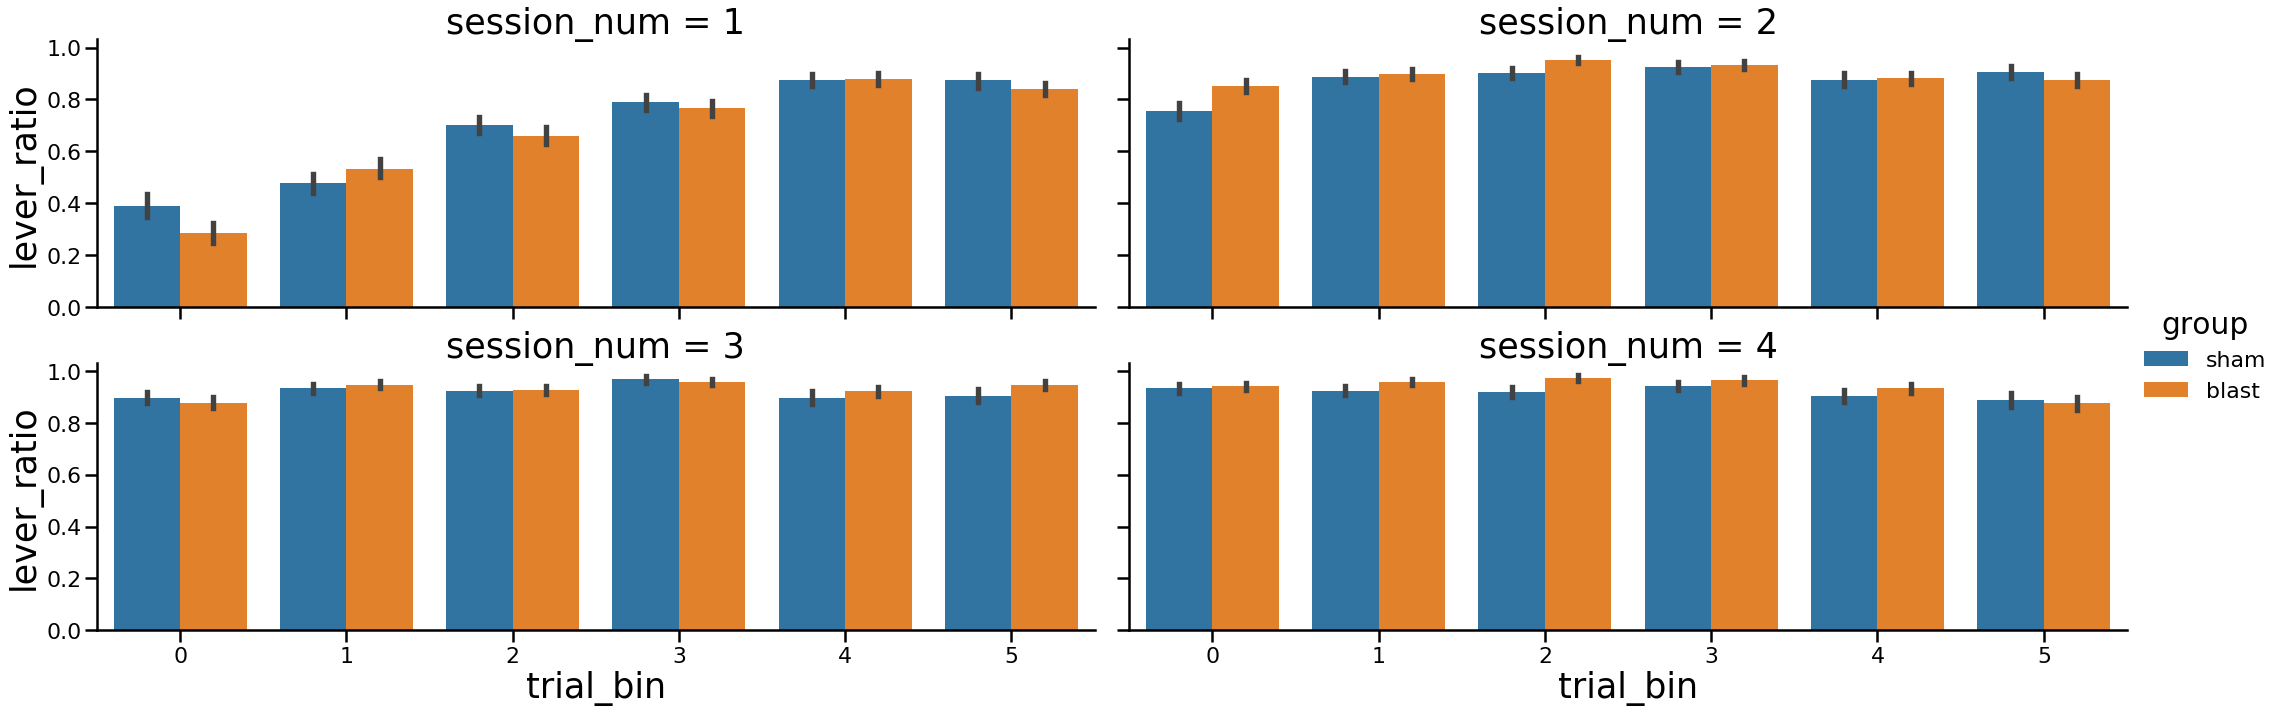

In [63]:
sns.catplot(x='trial_bin', y='lever_ratio', data=data_session, hue='group', col='session_num', col_wrap=2, kind='bar', height=5, aspect=3, ci=68)

plt.show()

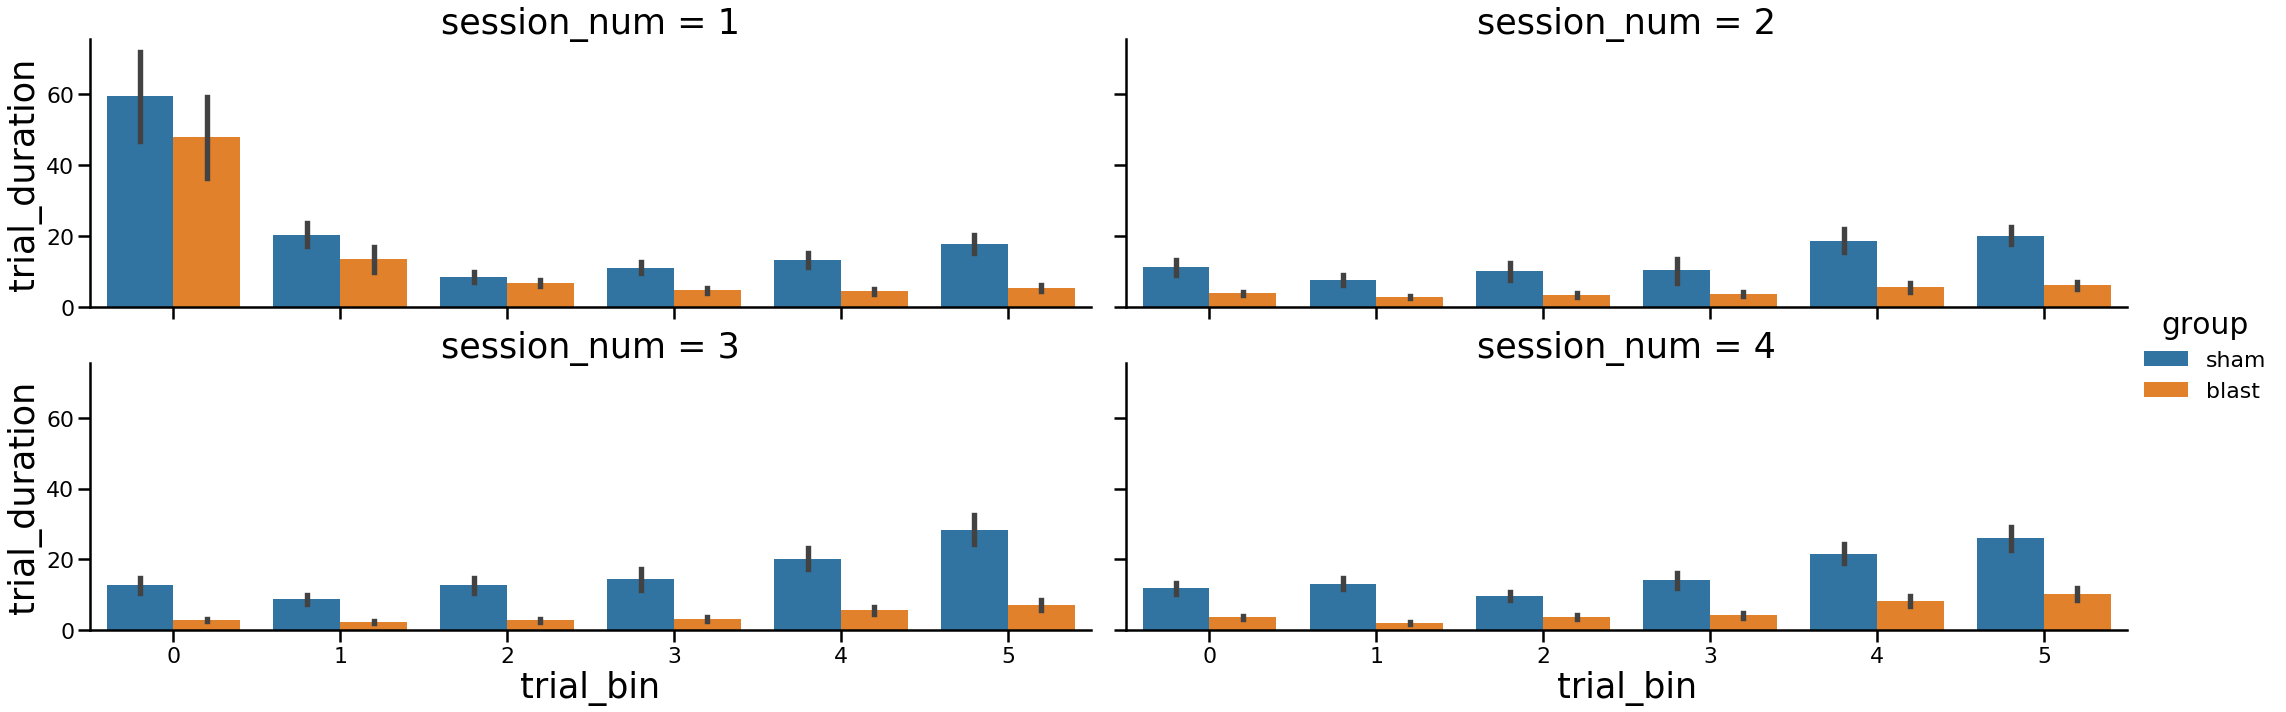

In [64]:
sns.catplot(x='trial_bin', y='trial_duration', data=data_session, hue='group', col='session_num', col_wrap=2, kind='bar', height=5, aspect=3, ci=68)

plt.show()

In [65]:
#get info for final reversal learning session
rev_4_active = data_session[(data_session['session'] == 'RLFR1') & (data_session['session_num'] == 4)].groupby(['animal_number', 'group'])[['active_lever_count']].sum().reset_index()
rev_4_time = data_session[(data_session['session'] == 'RLFR1') & (data_session['session_num'] == 4)].groupby(['animal_number', 'group'])[['trial_duration']].mean().reset_index()

### Extinction learning

In [66]:
data = all_data[all_data['stage'] == 'extinction_learn']
data_session = data[data['type'] == 'session']
data_ITI = data[data['type'] == 'ITI']
data.head(1)

,date,stage,type,session,session_num,cage,animal_number,group,active_lever,trial_num,trial_bin,trial_duration,lever_ratio,reinforcement_count,reinforcement_latency_1st,HE_count,HE_latency_1st,HE_latency_ave,active_lever_count,active_lever_latency_1st,inactive_lever_count,inactive_lever_latency_1st,active_lever_latency_ave,inactive_lever_latency_ave,reinforcement_latency_ave
0,200316,extinction_learn,session,EXT,1,158,825,sham,0,0,0,3.68,1.0,0,NaN,0,NaN,NaN,1,3.67,0,NaN,3.67,NaN,NaN


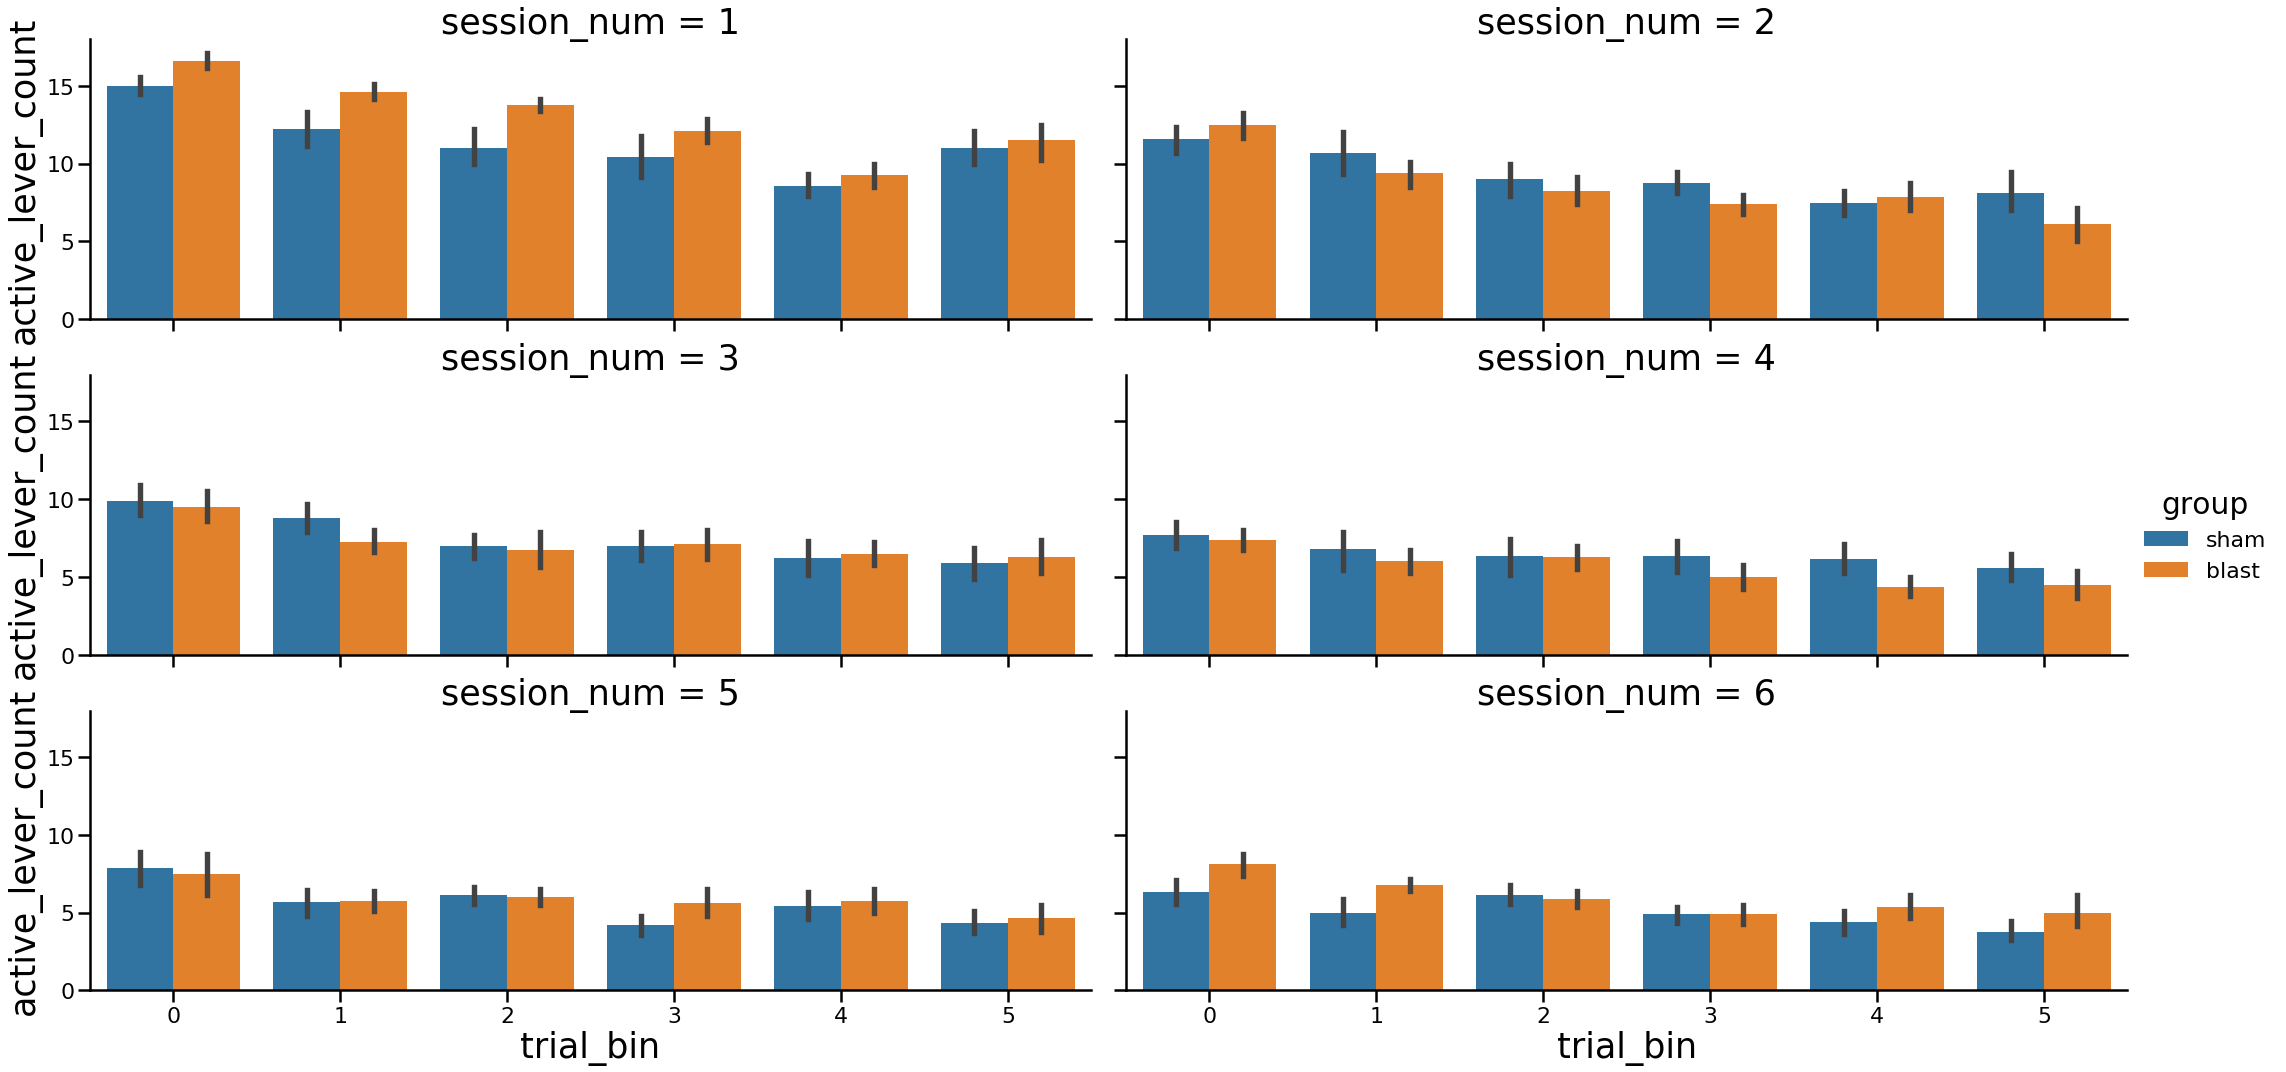

In [67]:
sns.catplot(x='trial_bin', y='active_lever_count', data=data_session.groupby(['session_num', 'trial_bin', 'animal_number', 'group'])['active_lever_count'].sum().reset_index(), hue='group', col='session_num', col_wrap=2, kind='bar', height=5, aspect=3, ci=68)

plt.show()

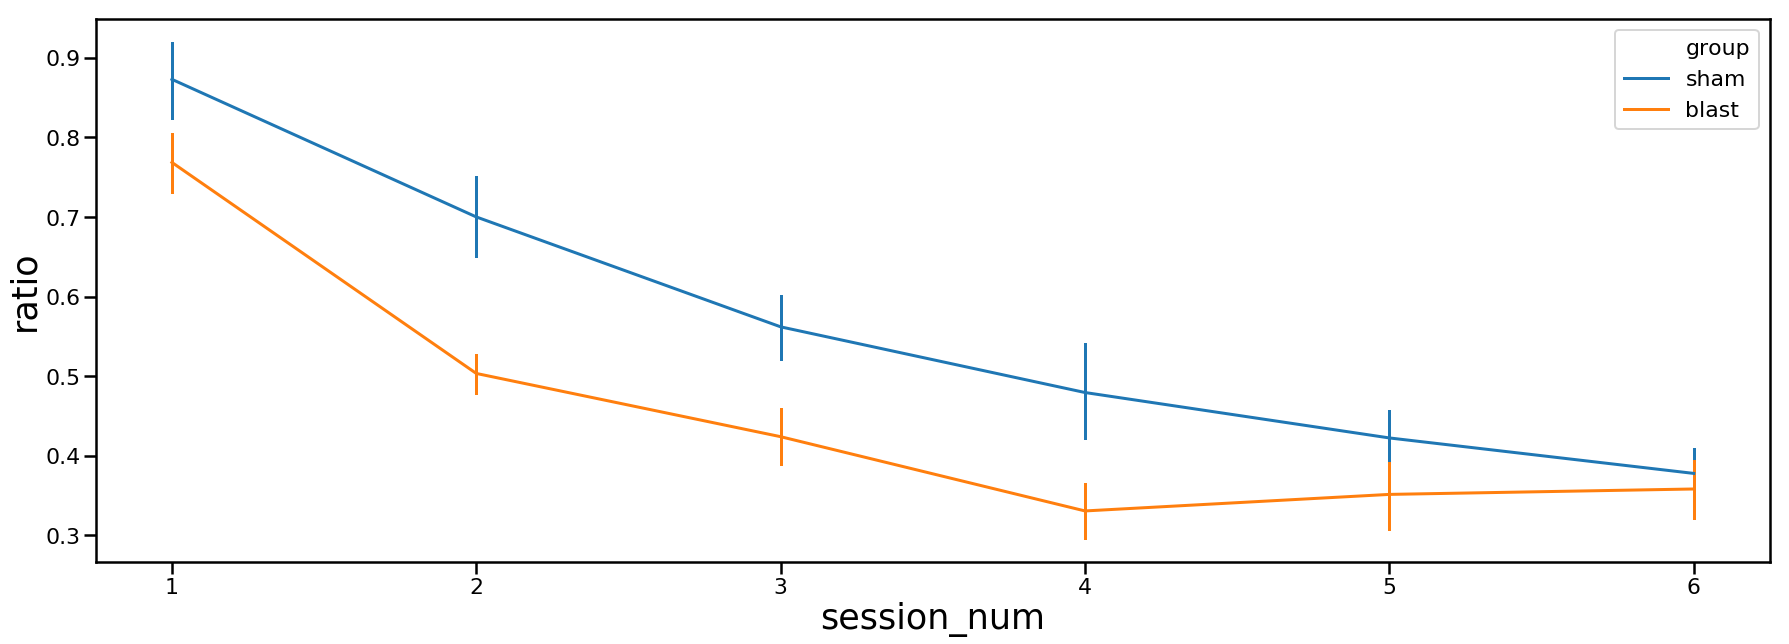

In [68]:
df_active = data_session.groupby(['session_num', 'animal_number', 'group'])[['active_lever_count']].sum().reset_index()

df_active['ratio'] = df_active.apply(lambda row: row['active_lever_count']/rev_4_active[rev_4_active['animal_number'] == row['animal_number']]['active_lever_count'].values[0], axis=1)

plt.figure(figsize=(30,10))
sns.lineplot(x='session_num', y='ratio', data=df_active, hue='group', err_style='bars', ci=68)

plt.show()

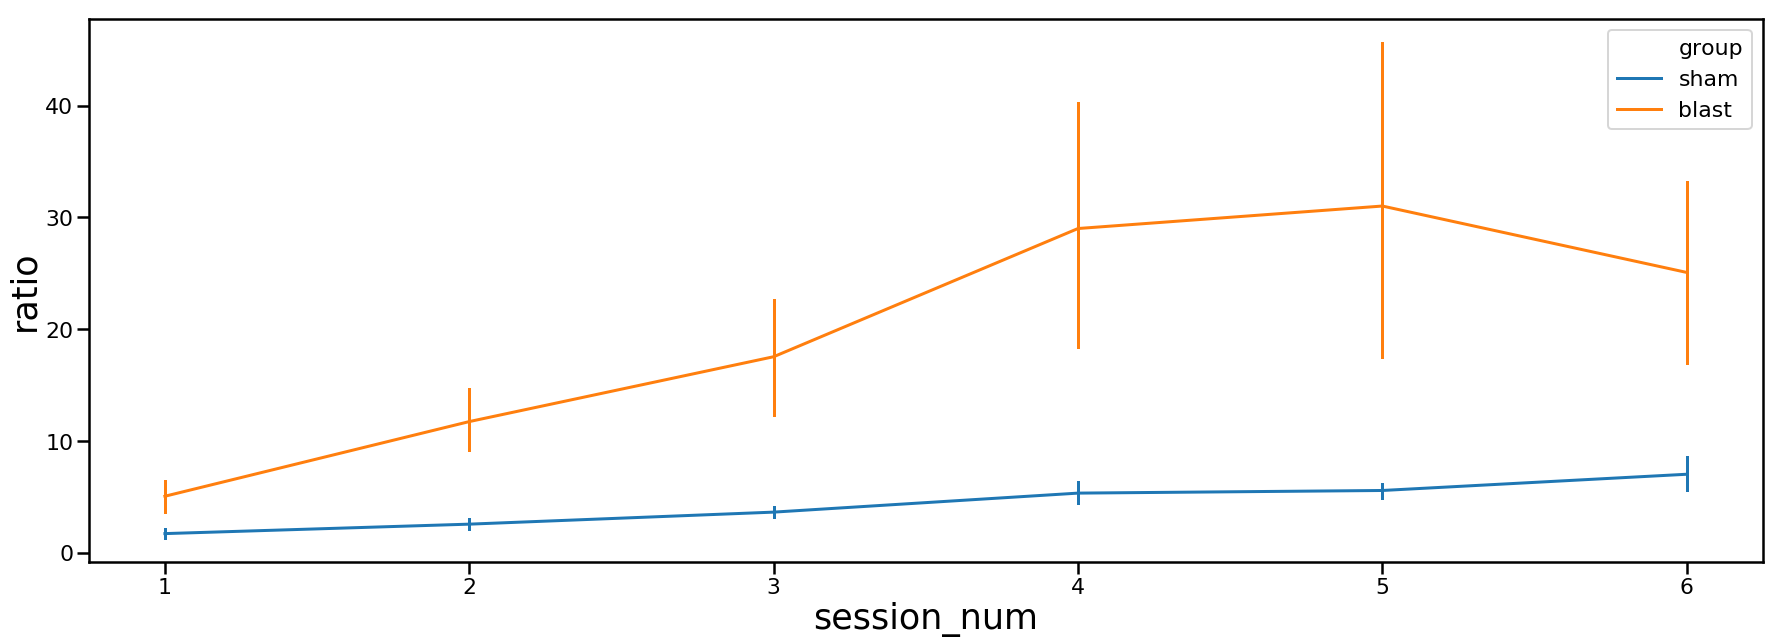

In [69]:
df_time = data_session.groupby(['session_num', 'animal_number', 'group'])[['trial_duration']].mean().reset_index()

df_time['ratio'] = df_time.apply(lambda row: row['trial_duration']/rev_4_time[rev_4_time['animal_number'] == row['animal_number']]['trial_duration'].values[0], axis=1)

plt.figure(figsize=(30,10))
sns.lineplot(x='session_num', y='ratio', data=df_time, hue='group', err_style='bars', ci=68)

plt.show()

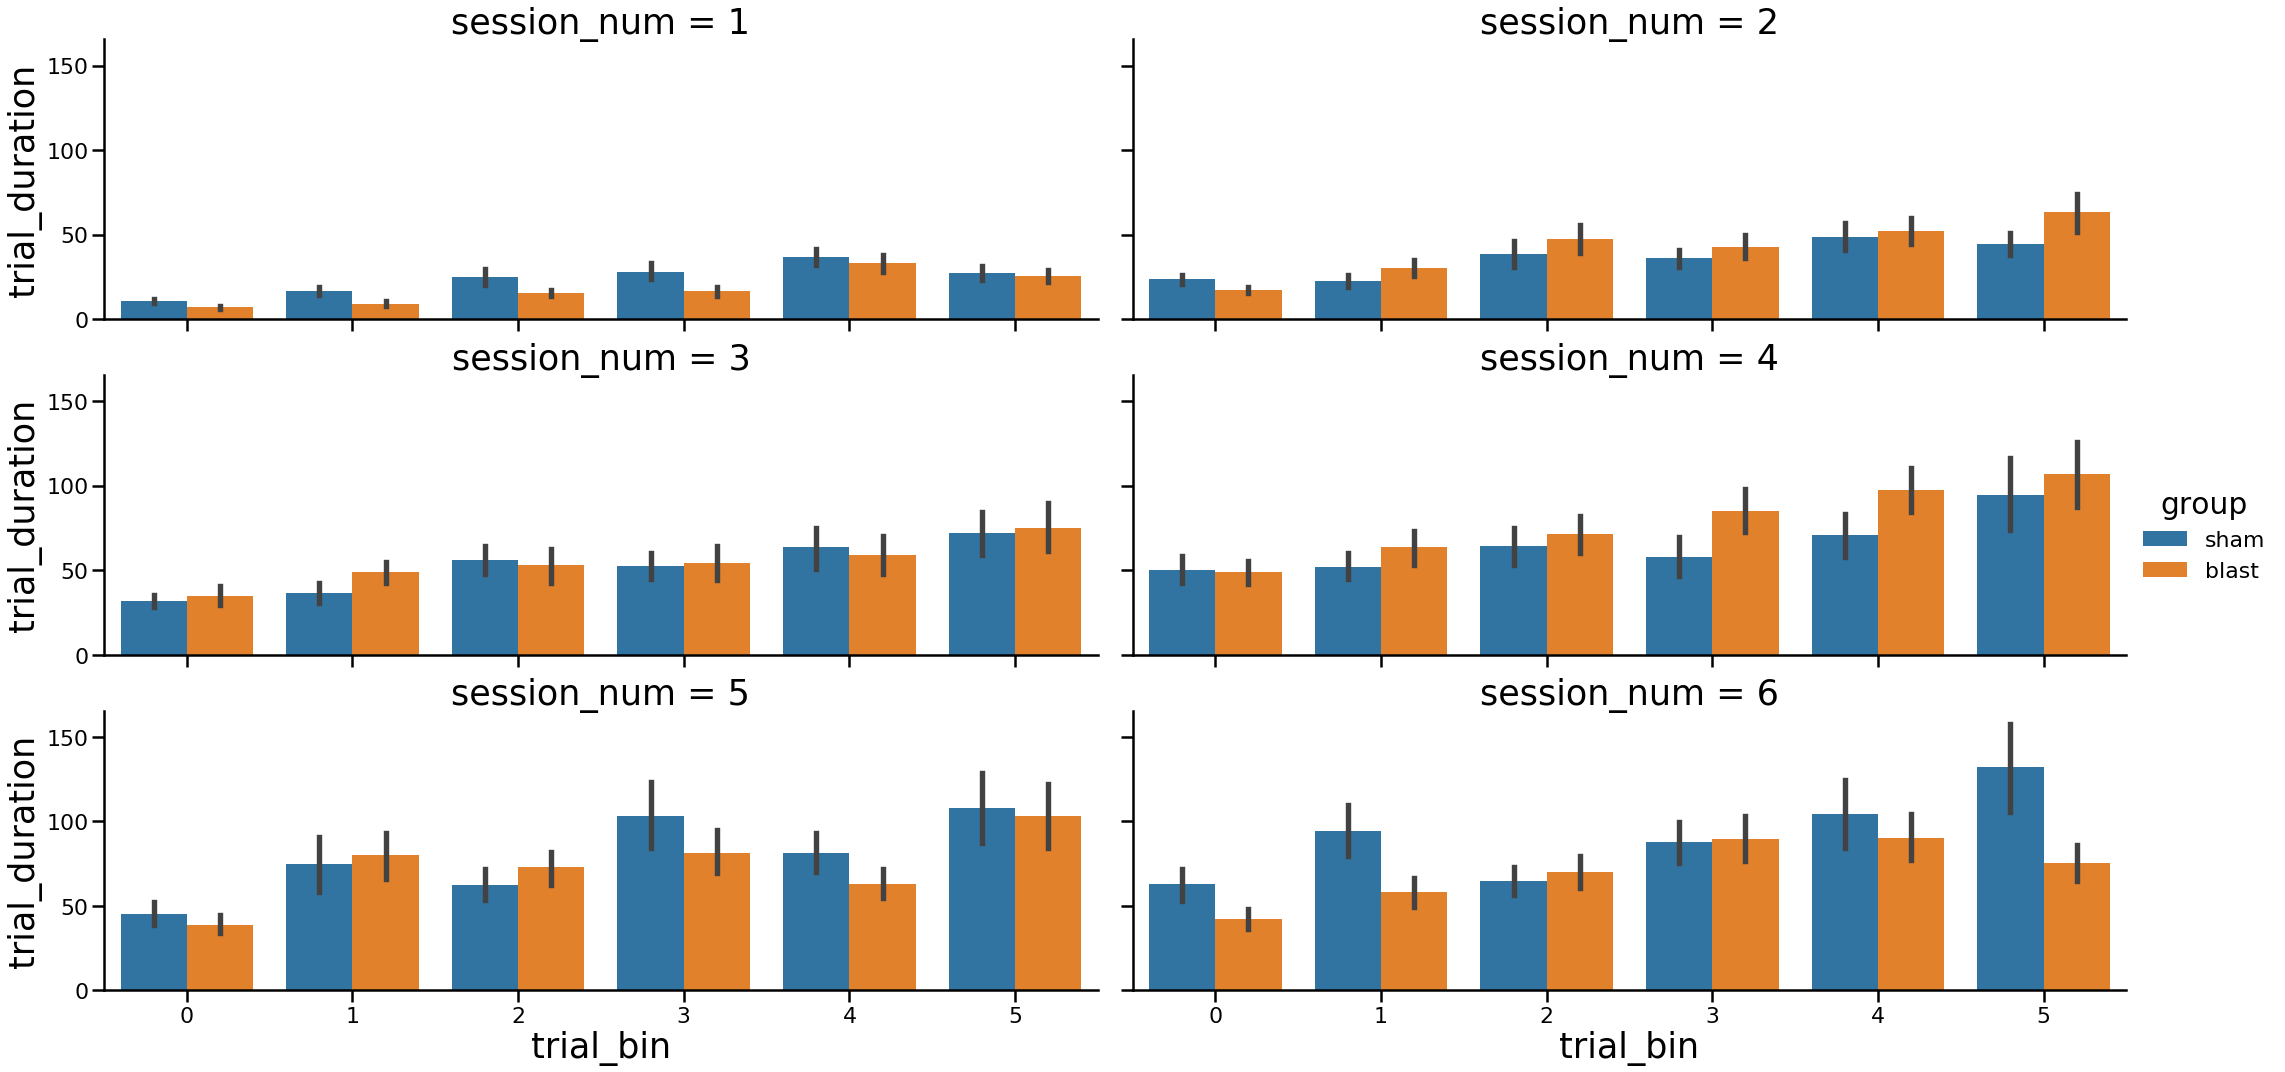

In [70]:
sns.catplot(x='trial_bin', y='trial_duration', data=data_session, hue='group', col='session_num', col_wrap=2, kind='bar', height=5, aspect=3, ci=68)

plt.show()

In [71]:
#get info for final extinction learning session
ext_6_active = data_session[(data_session['session'] == 'EXT') & (data_session['session_num'] == 6)].groupby(['animal_number', 'group'])[['active_lever_count']].sum().reset_index()
ext_6_time = data_session[(data_session['session'] == 'EXT') & (data_session['session_num'] == 6)].groupby(['animal_number', 'group'])[['trial_duration']].mean().reset_index()
ext_6_he = data_session[(data_session['session'] == 'EXT') & (data_session['session_num'] == 6)].groupby(['animal_number', 'group'])[['HE_count']].sum().reset_index()

ext_6_active_bins = data_session[(data_session['session'] == 'EXT') & (data_session['session_num'] == 6)].groupby(['trial_bin', 'animal_number', 'group'])[['active_lever_count']].sum().reset_index()
ext_6_time_bins = data_session[(data_session['session'] == 'EXT') & (data_session['session_num'] == 6)].groupby(['trial_bin', 'animal_number', 'group'])[['trial_duration']].mean().reset_index()
ext_6_he_bins = data_session[(data_session['session'] == 'EXT') & (data_session['session_num'] == 6)].groupby(['trial_bin', 'animal_number', 'group'])[['HE_count']].sum().reset_index()


### Cue inducted reinstatement

In [60]:
data = all_data[all_data['stage'] == 'reinst_cue']
data_session = data[data['type'] == 'session']
data_ITI = data[data['type'] == 'ITI']
data.head(1)

,date,stage,type,session,session_num,cage,animal_number,group,active_lever,trial_num,trial_bin,trial_duration,lever_ratio,reinforcement_count,reinforcement_latency_1st,HE_count,HE_latency_1st,HE_latency_ave,active_lever_count,active_lever_latency_1st,inactive_lever_count,inactive_lever_latency_1st,active_lever_latency_ave,inactive_lever_latency_ave,reinforcement_latency_ave
0,200322,reinst_cue,session,RCP,1,158,825,sham,0,0,0,9.36,1.0,0,NaN,0,NaN,NaN,1,9.35,0,NaN,9.35,NaN,NaN


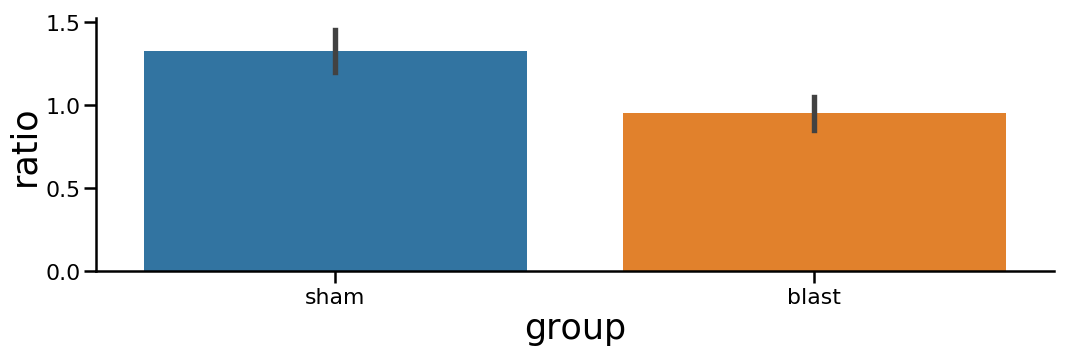

In [75]:
df_active = data_session.groupby(['animal_number', 'group'])[['active_lever_count']].sum().reset_index()

df_active['ratio'] = df_active.apply(lambda row: row['active_lever_count']/ext_6_active[ext_6_active['animal_number'] == row['animal_number']]['active_lever_count'].values[0], axis=1)

sns.catplot(x='group', y='ratio', data=df_active, kind='bar', height=5, aspect=3, ci=68)

plt.show()

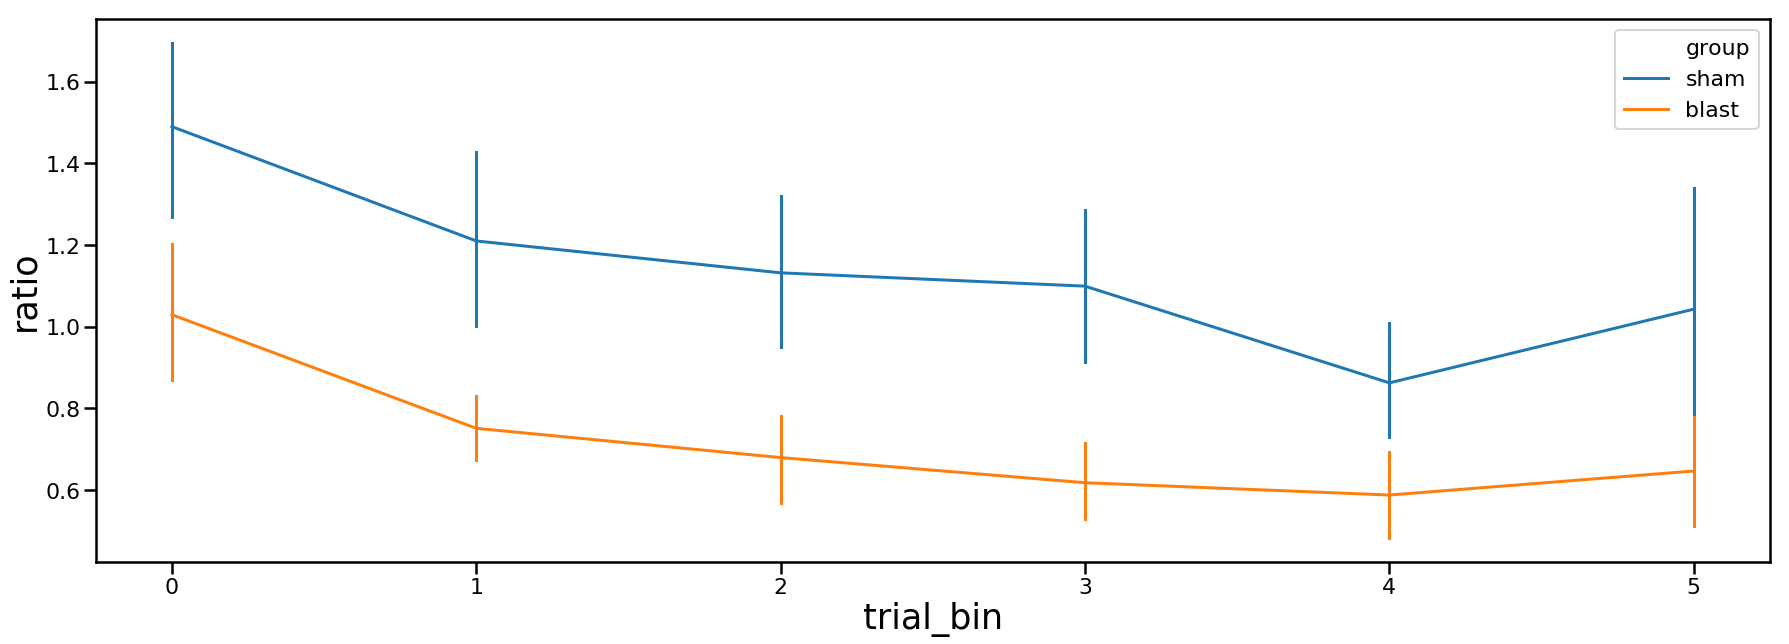

In [74]:
df_active_bins = data_session.groupby(['trial_bin', 'animal_number', 'group'])[['active_lever_count']].sum().reset_index()

df_active_bins['ratio'] = df_active_bins.apply(lambda row: row['active_lever_count']/ext_6_active_bins[ext_6_active_bins['animal_number'] == row['animal_number']]['active_lever_count'].values[0], axis=1)

plt.figure(figsize=(30,10))
sns.lineplot(x='trial_bin', y='ratio', data=df_active_bins, hue='group', err_style='bars', ci=68)

plt.show()

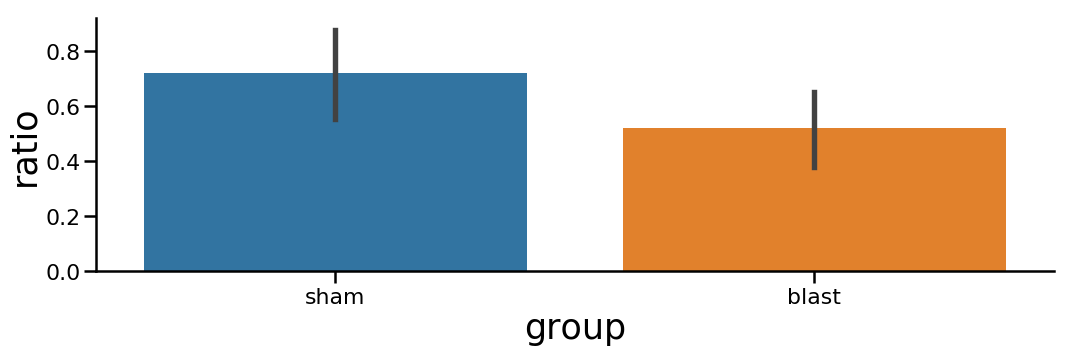

In [77]:
df_he = data_session.groupby(['animal_number', 'group'])[['HE_count']].sum().reset_index()

df_he['ratio'] = df_he.apply(lambda row: row['HE_count']/ext_6_he[ext_6_he['animal_number'] == row['animal_number']]['HE_count'].values[0], axis=1)

sns.catplot(x='group', y='ratio', data=df_he, kind='bar', height=5, aspect=3, ci=68)

plt.show()

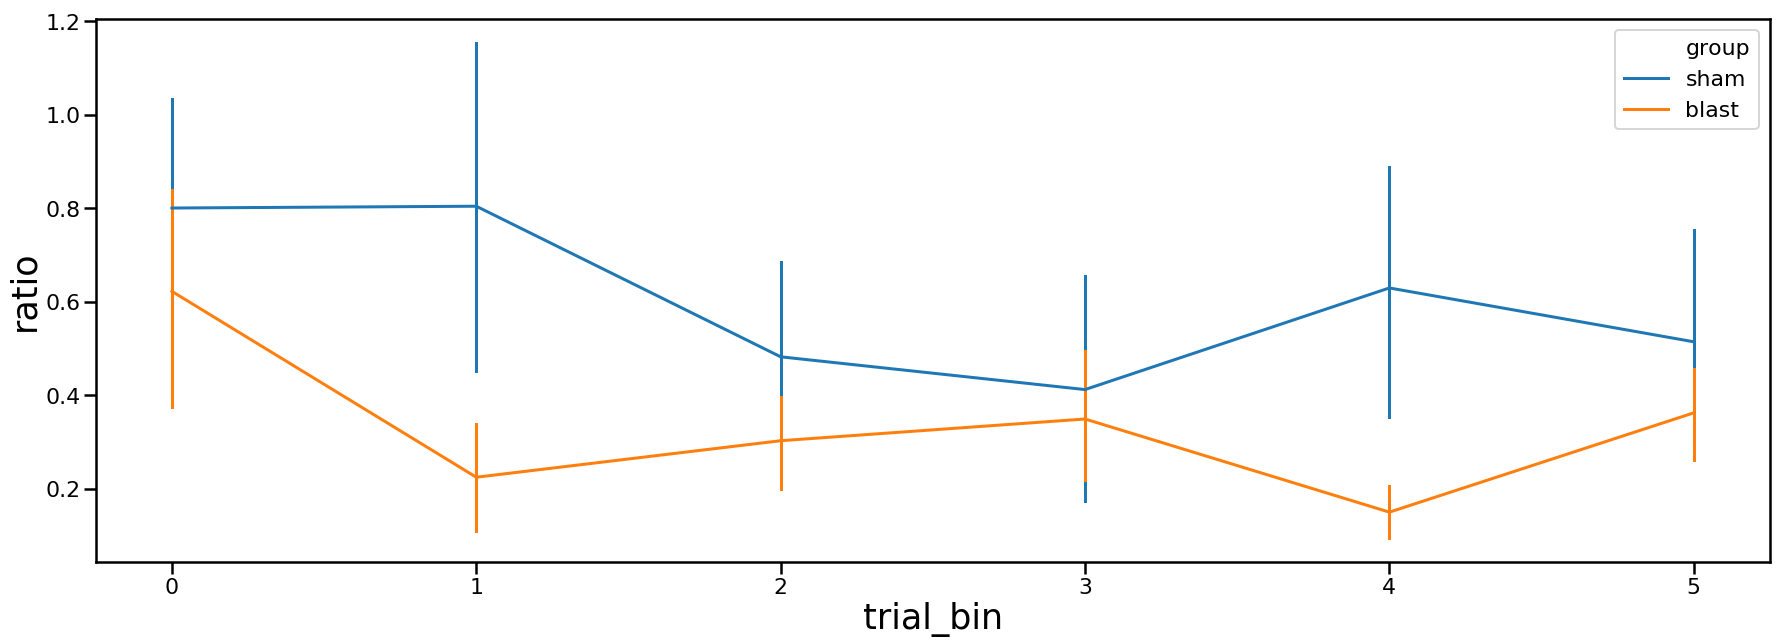

In [79]:
df_he_bins = data_session.groupby(['trial_bin', 'animal_number', 'group'])[['HE_count']].sum().reset_index()

df_he_bins['ratio'] = df_he_bins.apply(lambda row: row['HE_count']/ext_6_he_bins[ext_6_he_bins['animal_number'] == row['animal_number']]['HE_count'].values[0], axis=1)

plt.figure(figsize=(30,10))
sns.lineplot(x='trial_bin', y='ratio', data=df_he_bins, hue='group', err_style='bars', ci=68)

plt.show()

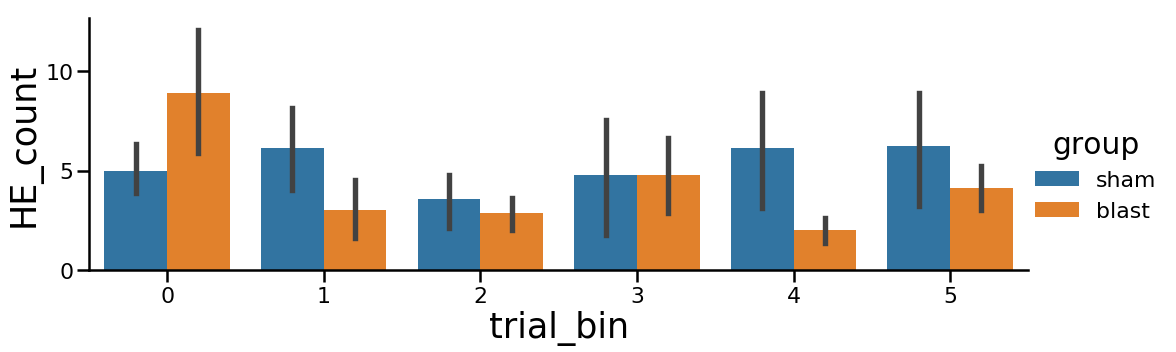

In [78]:
sns.catplot(x='trial_bin', y='HE_count', data=data_session.groupby(['trial_bin', 'animal_number', 'group'])['HE_count'].sum().reset_index(), hue='group', kind='bar', height=5, aspect=3, ci=68)

plt.show()

In [61]:
#get info for final cue reinst bin
rein_cue_active = data_session[(data_session['session'] == 'RCP') & (data_session['trial_bin'] == 5)].groupby(['animal_number', 'group'])[['active_lever_count']].sum().reset_index()
rein_cue_time = data_session[(data_session['session'] == 'RCP') & (data_session['trial_bin'] == 5)].groupby(['animal_number', 'group'])[['trial_duration']].mean().reset_index()
rein_cue_he = data_session[(data_session['session'] == 'RCP') & (data_session['trial_bin'] == 5)].groupby(['animal_number', 'group'])[['HE_count']].sum().reset_index()
rein_cue_active['active_lever_count_6'] = rein_cue_active['active_lever_count']*6
rein_cue_time['trial_duration_6'] = rein_cue_time['trial_duration']*6
rein_cue_he['HE_count_6'] = rein_cue_he['HE_count']*6

### Drug reinstatement

In [70]:
data = all_data[all_data['stage'] == 'reinst_drug']
data_session = data[data['type'] == 'session']
data_ITI = data[data['type'] == 'ITI']
data.head(1)

,date,stage,type,session,session_num,cage,animal_number,group,active_lever,trial_num,trial_bin,trial_duration,lever_ratio,reinforcement_count,reinforcement_latency_1st,HE_count,HE_latency_1st,HE_latency_ave,active_lever_count,active_lever_latency_1st,inactive_lever_count,inactive_lever_latency_1st,active_lever_latency_ave,inactive_lever_latency_ave,reinforcement_latency_ave
0,200323,reinst_drug,session,RDP,1,158,825,sham,0,0,0,2.15,1.0,0,NaN,0,NaN,NaN,1,2.14,0,NaN,2.14,NaN,NaN


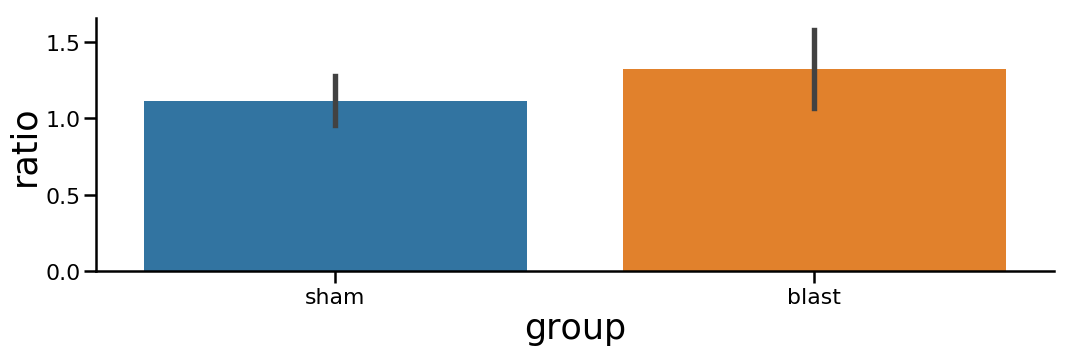

In [71]:
df_active = data_session.groupby(['animal_number', 'group'])[['active_lever_count']].sum().reset_index()

df_active['ratio'] = df_active.apply(lambda row: row['active_lever_count']/rein_cue_active[rein_cue_active['animal_number'] == row['animal_number']]['active_lever_count_6'].values[0], axis=1)

sns.catplot(x='group', y='ratio', data=df_active, kind='bar', height=5, aspect=3, ci=68)

plt.show()

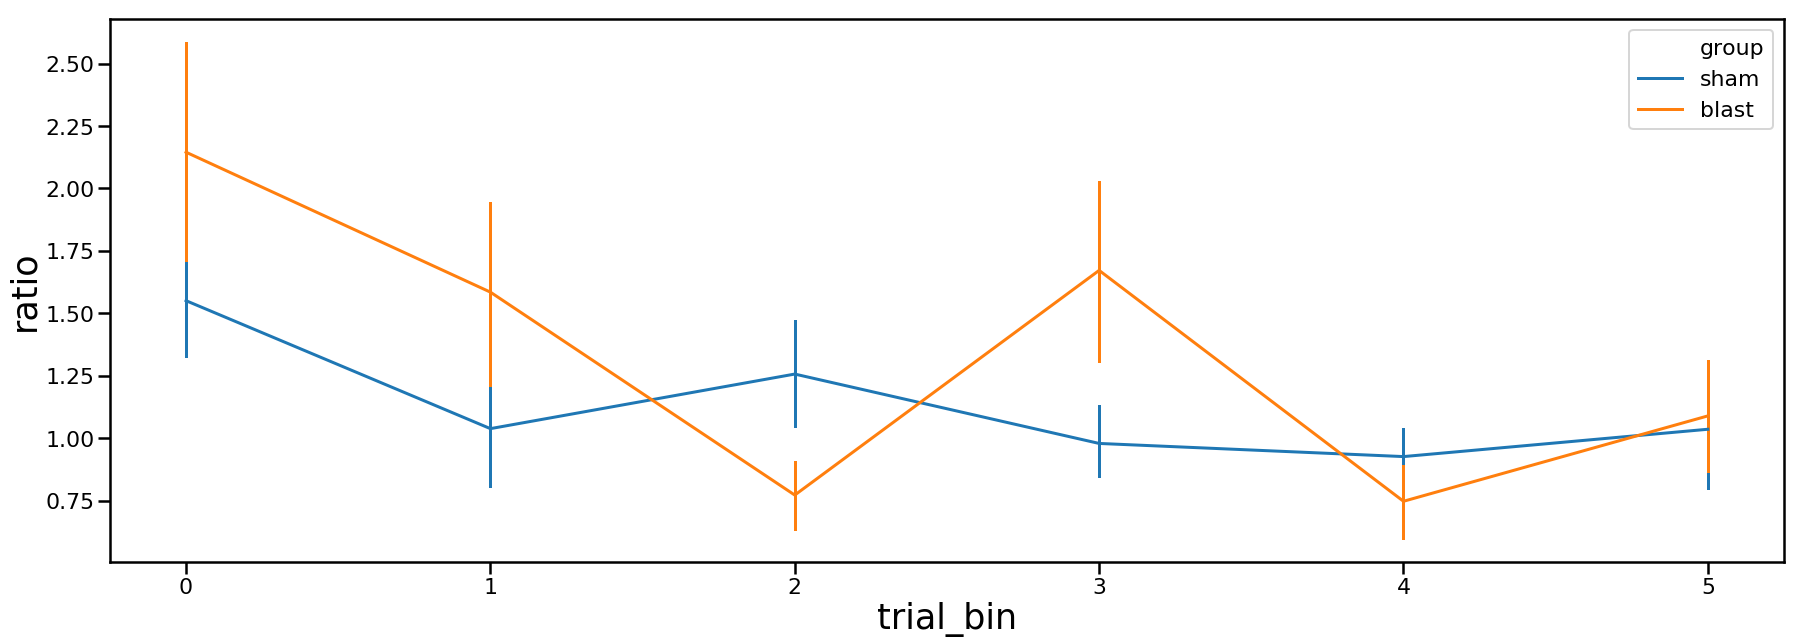

In [19]:
df_active_bins = data_session.groupby(['trial_bin', 'animal_number', 'group'])[['active_lever_count']].sum().reset_index()

df_active_bins['ratio'] = df_active_bins.apply(lambda row: row['active_lever_count']/rein_cue_active[rein_cue_active['animal_number'] == row['animal_number']]['active_lever_count'].values[0], axis=1)

plt.figure(figsize=(30,10))
sns.lineplot(x='trial_bin', y='ratio', data=df_active_bins, hue='group', err_style='bars', ci=68)

plt.show()

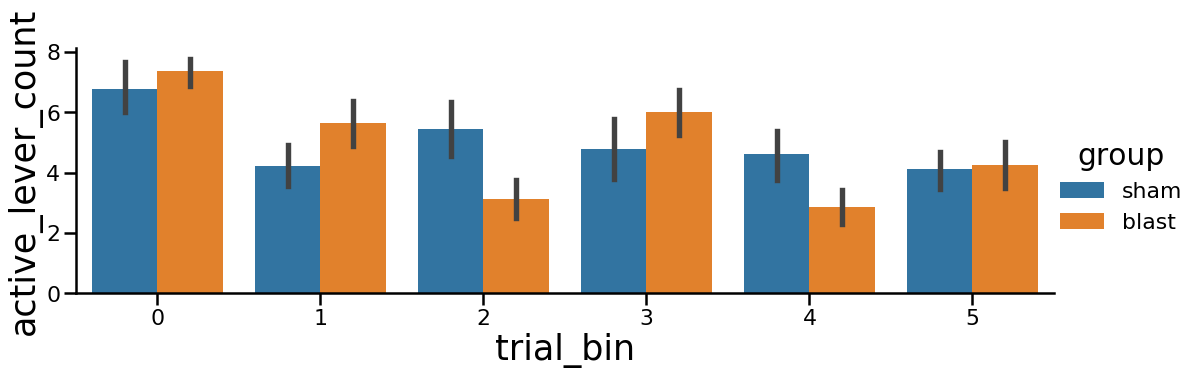

In [7]:
sns.catplot(x='trial_bin', y='active_lever_count', data=data_session.groupby(['trial_bin', 'animal_number', 'group'])['active_lever_count'].sum().reset_index(), hue='group', kind='bar', height=5, aspect=3, ci=68)

plt.show()

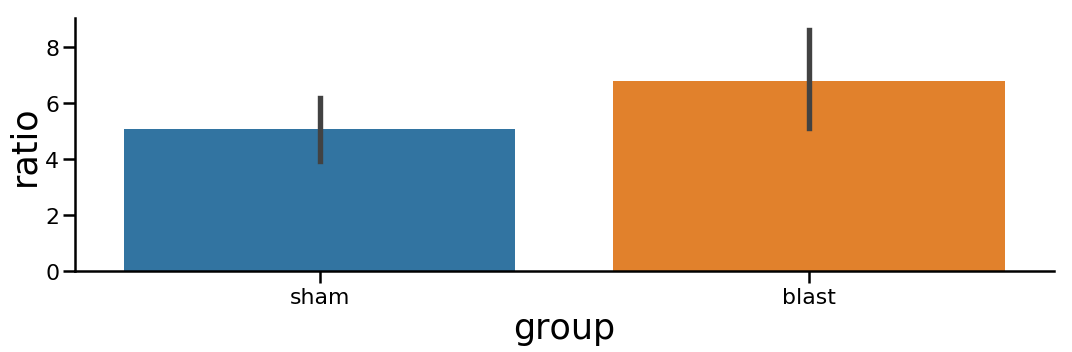

In [63]:
df_time = data_session.groupby(['animal_number', 'group'])[['trial_duration']].sum().reset_index()

df_time['ratio'] = df_time.apply(lambda row: row['trial_duration']/rein_cue_time[rein_cue_time['animal_number'] == row['animal_number']]['trial_duration_6'].values[0], axis=1)

sns.catplot(x='group', y='ratio', data=df_time, kind='bar', height=5, aspect=3, ci=68)

plt.show()

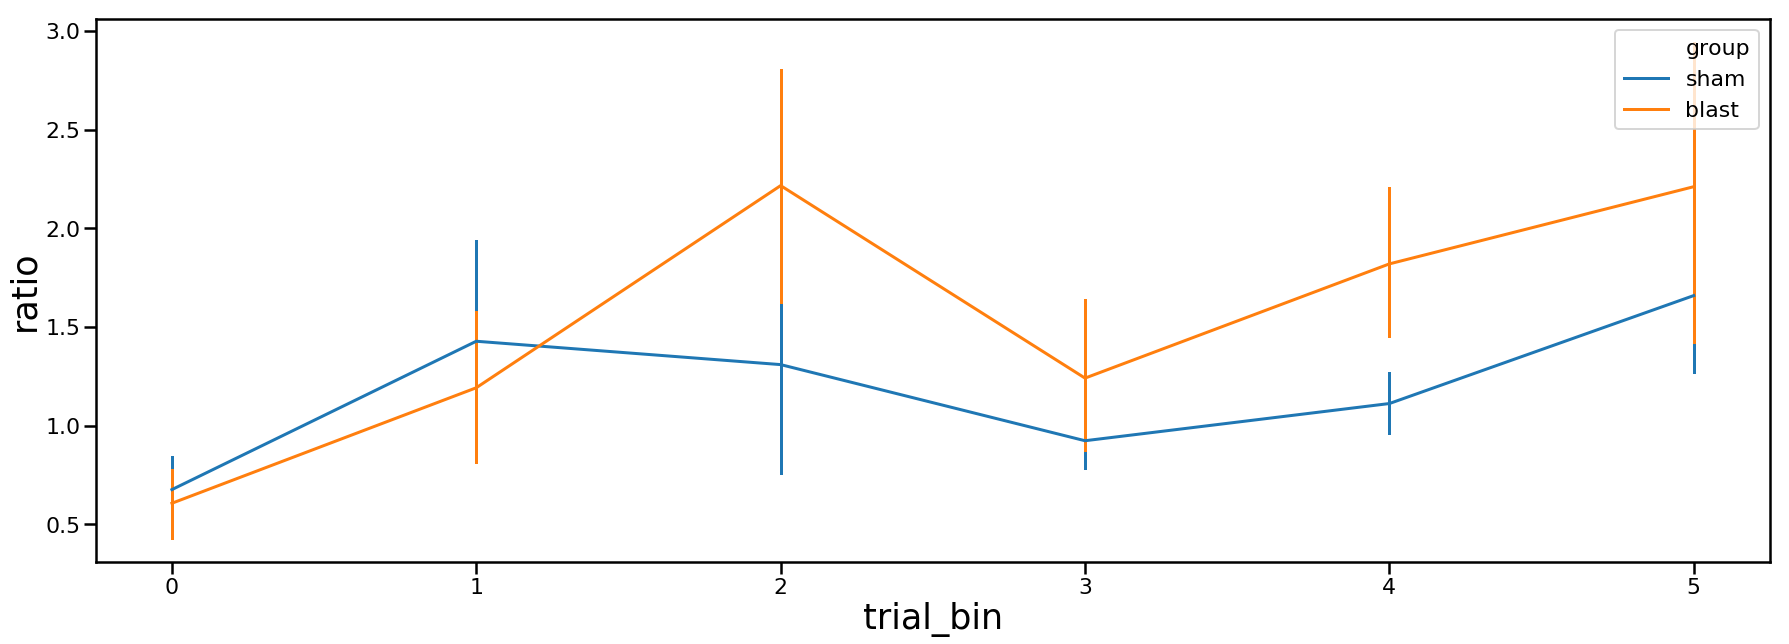

In [64]:
df_time_bins = data_session.groupby(['trial_bin', 'animal_number', 'group'])[['trial_duration']].mean().reset_index()

df_time_bins['ratio'] = df_time_bins.apply(lambda row: row['trial_duration']/rein_cue_time[rein_cue_time['animal_number'] == row['animal_number']]['trial_duration'].values[0], axis=1)

plt.figure(figsize=(30,10))
sns.lineplot(x='trial_bin', y='ratio', data=df_time_bins, hue='group', err_style='bars', ci=68)

plt.show()

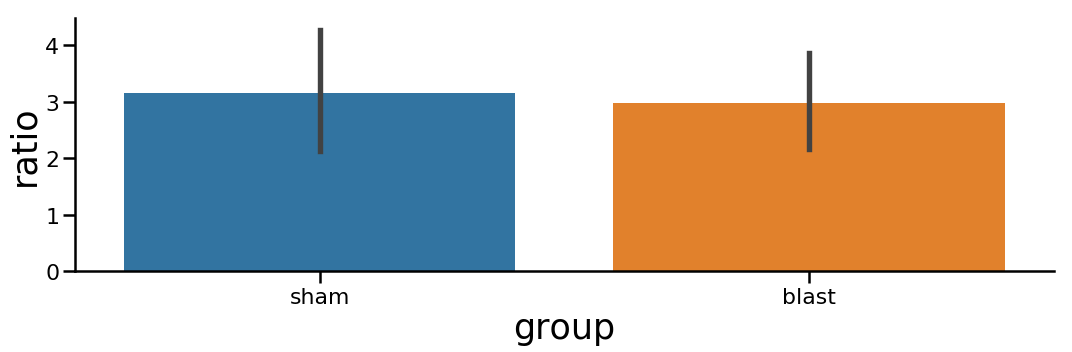

In [52]:
df_he = data_session.groupby(['animal_number', 'group'])[['HE_count']].sum().reset_index()

df_he['ratio'] = df_he.apply(lambda row: row['HE_count']/rein_cue_he[rein_cue_he['animal_number'] == row['animal_number']]['HE_count_6'].values[0], axis=1)
df_he['ratio'] = df_he['ratio'].replace([np.inf, -np.inf], np.nan).dropna()

sns.catplot(x='group', y='ratio', data=df_he, kind='bar', height=5, aspect=3, ci=68)

plt.show()

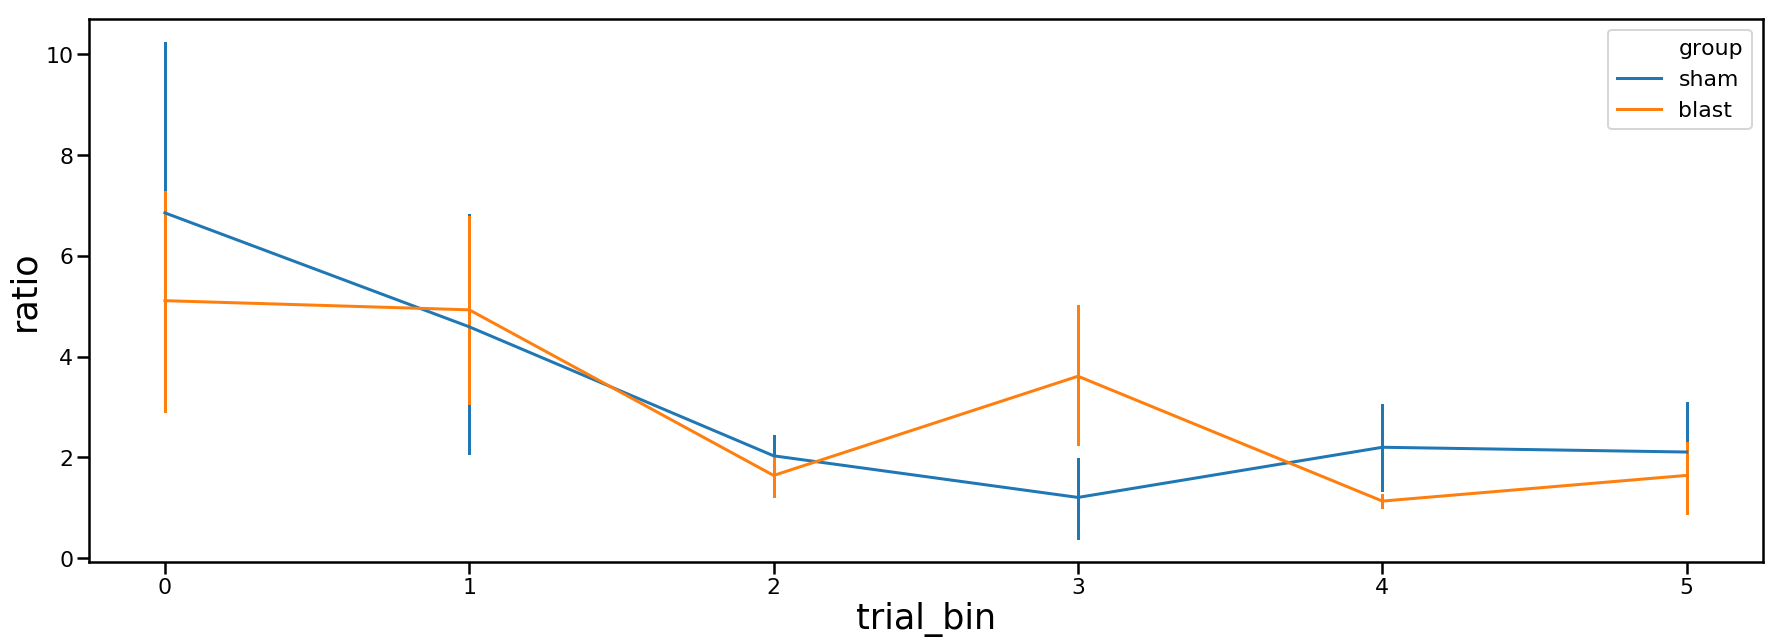

In [65]:
df_he_bins = data_session.groupby(['trial_bin', 'animal_number', 'group'])[['HE_count']].sum().reset_index()

df_he_bins['ratio'] = df_he_bins.apply(lambda row: row['HE_count']/rein_cue_he[rein_cue_he['animal_number'] == row['animal_number']]['HE_count'].values[0], axis=1)
df_he_bins['ratio'] = df_he_bins['ratio'].replace([np.inf, -np.inf], np.nan).dropna()

plt.figure(figsize=(30,10))
sns.lineplot(x='trial_bin', y='ratio', data=df_he_bins, hue='group', err_style='bars', ci=68)

plt.show()

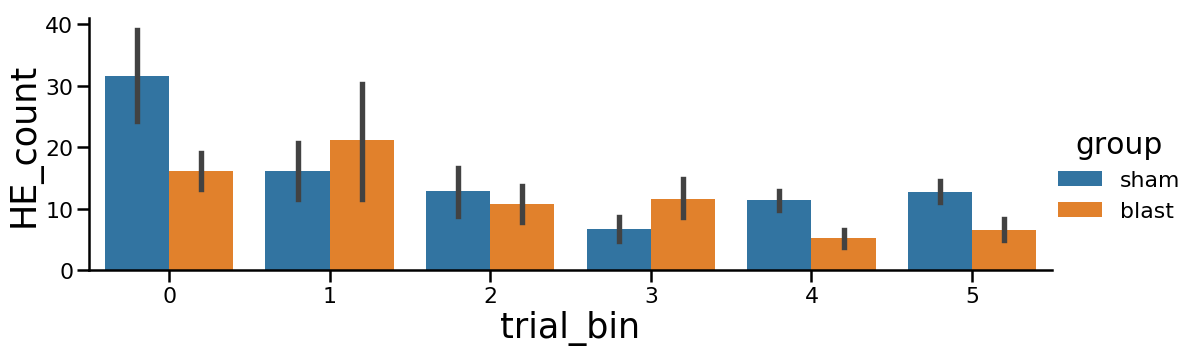

In [43]:
sns.catplot(x='trial_bin', y='HE_count', data=data_session.groupby(['trial_bin', 'animal_number', 'group'])['HE_count'].sum().reset_index(), hue='group', kind='bar', height=5, aspect=3, ci=68)

plt.show()

### All together

In [66]:
data_session = all_data[all_data['type'] == 'session']
data_ITI = all_data[all_data['type'] == 'ITI']
data_session.head(1)

,date,stage,type,session,session_num,cage,animal_number,group,active_lever,trial_num,trial_bin,trial_duration,lever_ratio,reinforcement_count,reinforcement_latency_1st,HE_count,HE_latency_1st,HE_latency_ave,active_lever_count,active_lever_latency_1st,inactive_lever_count,inactive_lever_latency_1st,active_lever_latency_ave,inactive_lever_latency_ave,reinforcement_latency_ave
0,200316,extinction_learn,session,EXT,1,158,825,sham,0,0,0,3.68,1.0,0,NaN,0,NaN,NaN,1,3.67,0,NaN,3.67,NaN,NaN


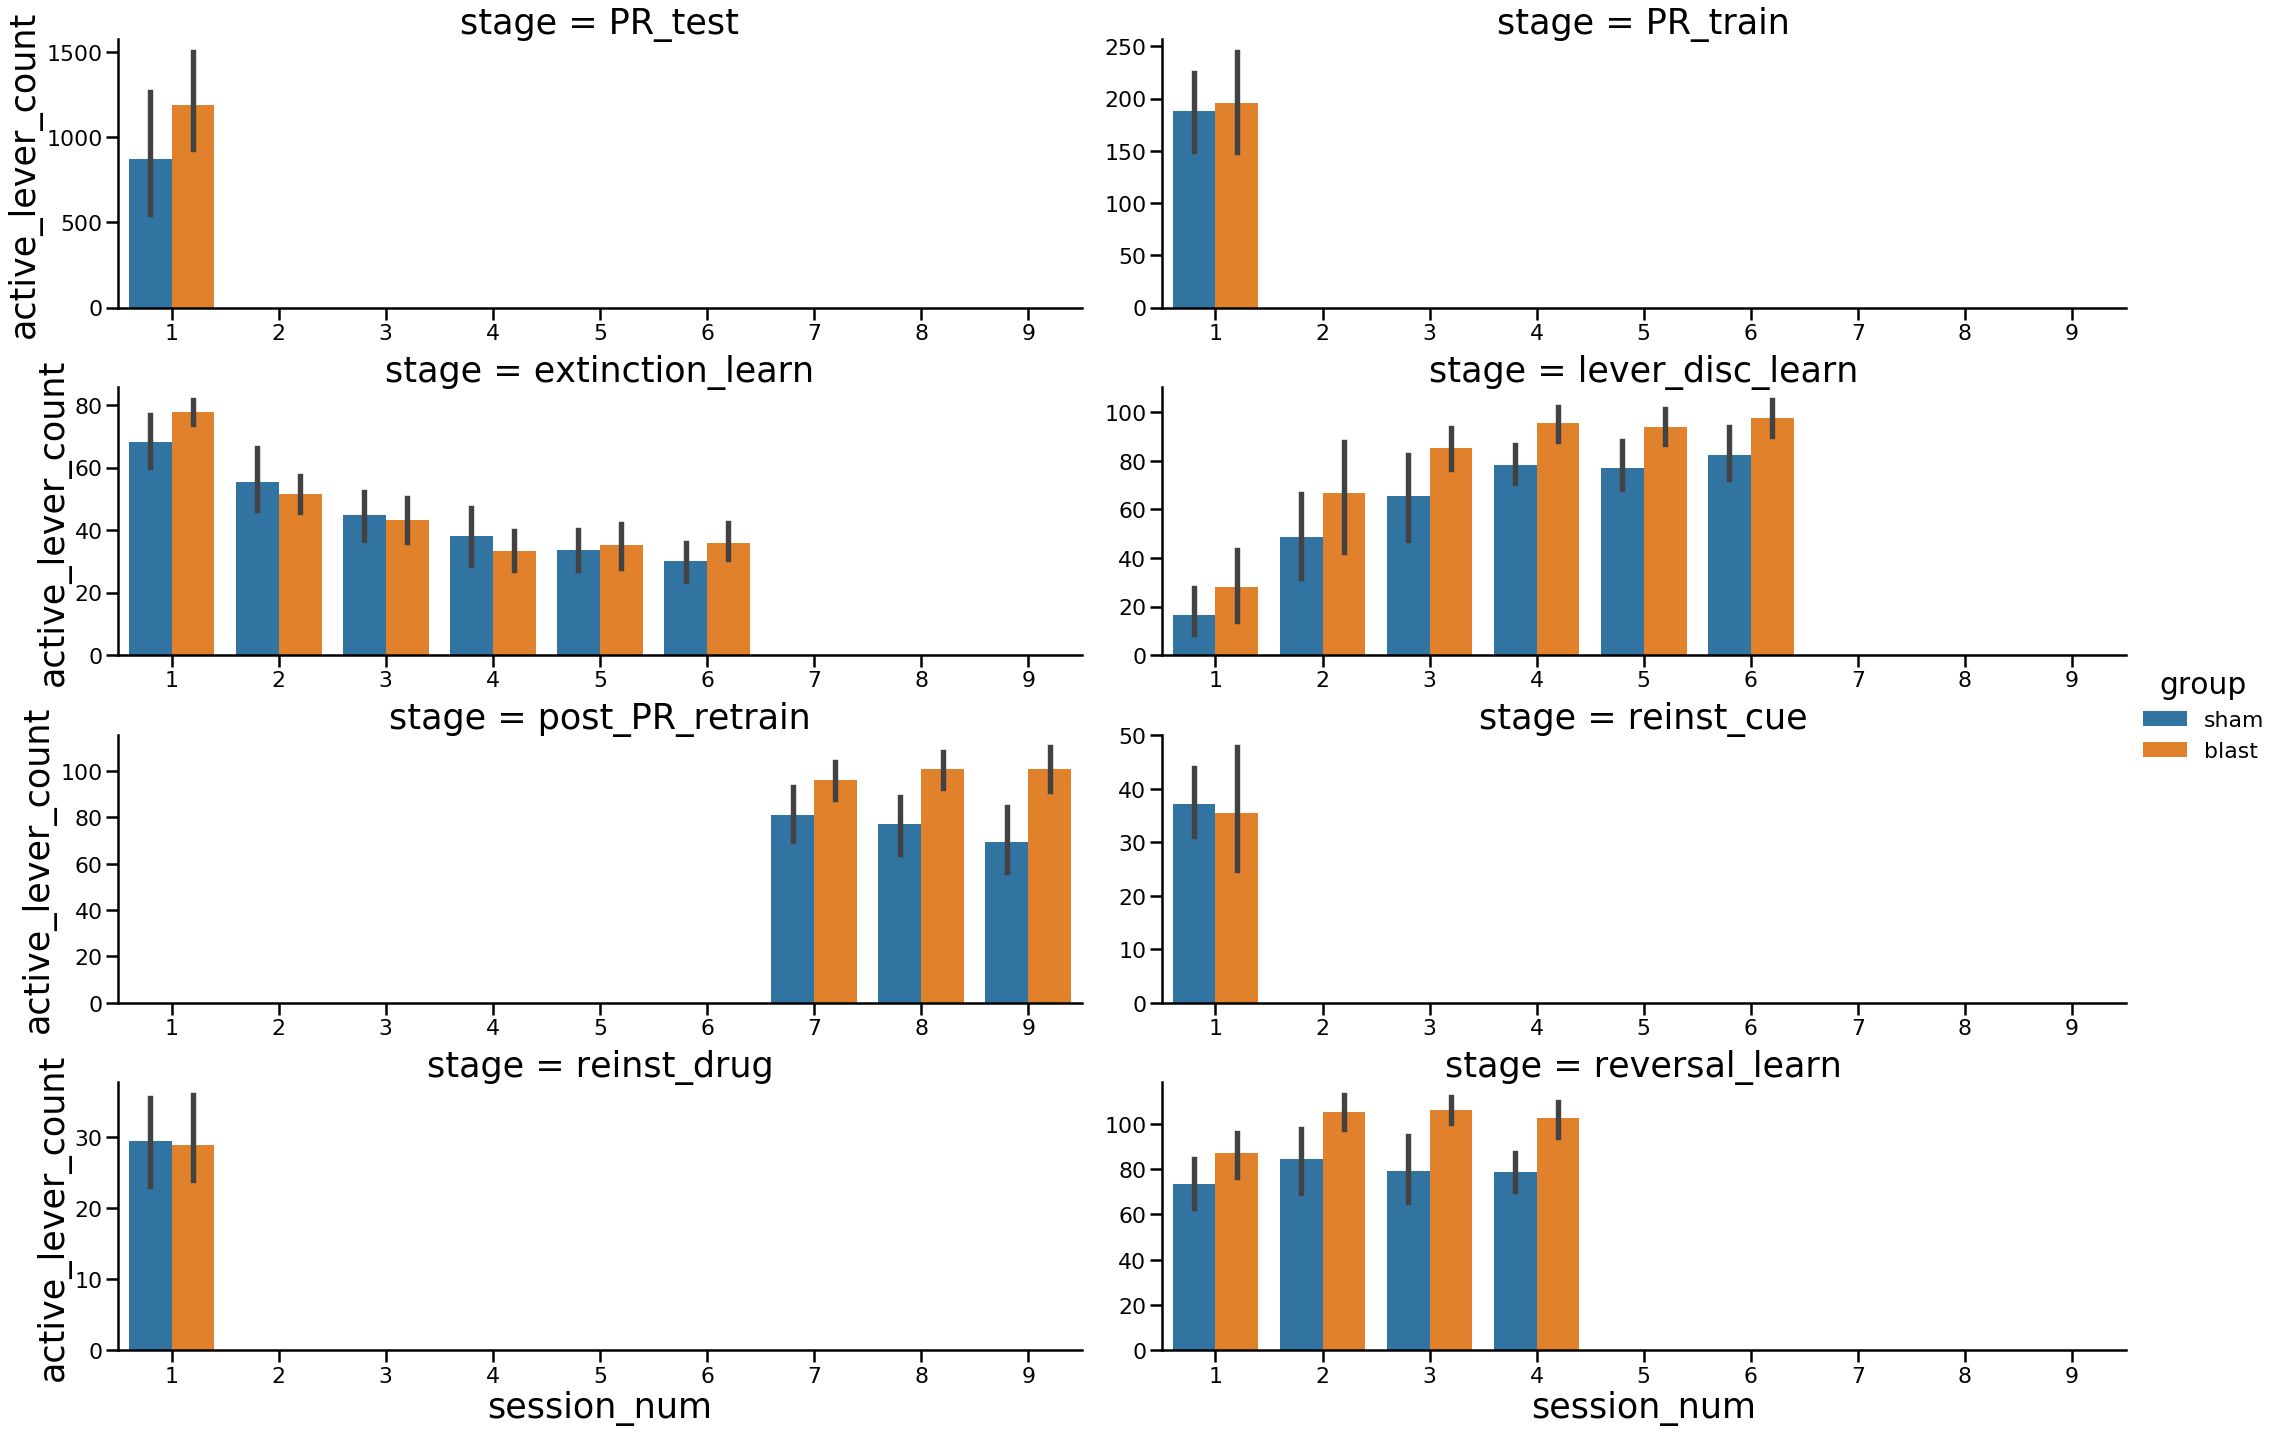

In [67]:
sns.catplot(x='session_num', y='active_lever_count', data=data_session.groupby(['stage', 'session', 'session_num', 'animal_number', 'group'])['active_lever_count'].sum().reset_index(), hue='group', col='stage', col_wrap=2, kind='bar', height=5, aspect=3, sharex=False, sharey=False)

plt.show()

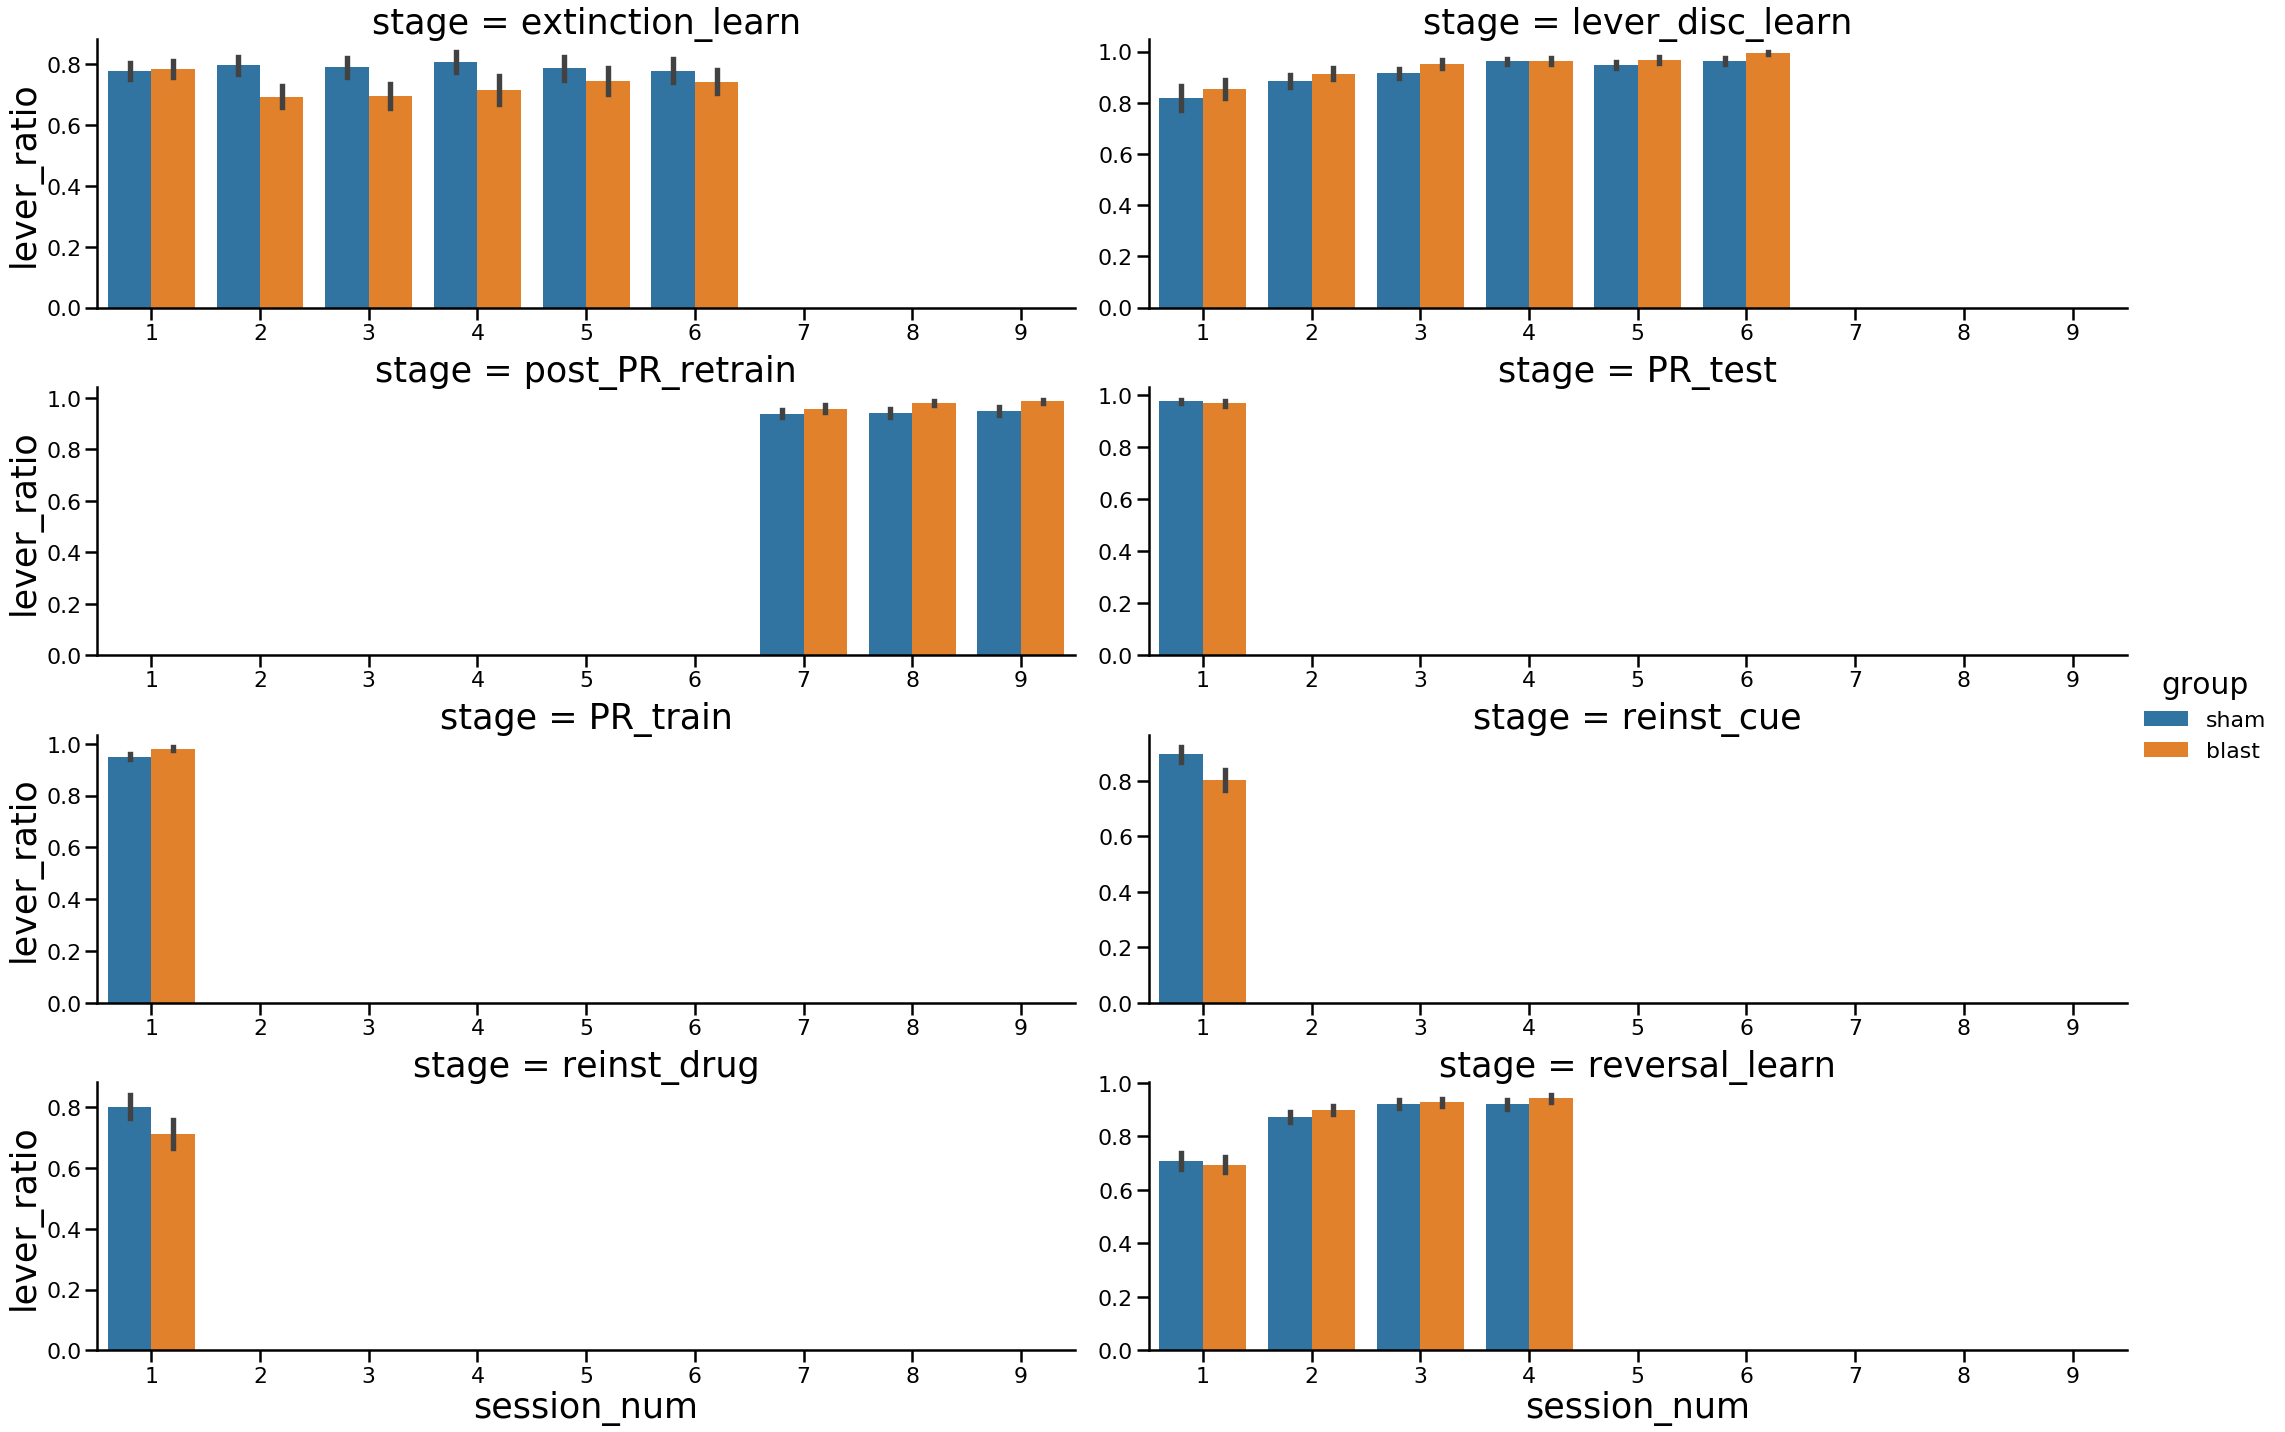

In [68]:
sns.catplot(x='session_num', y='lever_ratio', data=data_session, hue='group', col='stage', col_wrap=2, kind='bar', height=5, aspect=3, sharex=False, sharey=False)

plt.show()